Spiking Neural Network World Representation Output Analysis Notebook
===========================================================

Welcome, dear AI nerd. Here you will find the plotting of the results from the Spiking Neural Network I am working on. Optimally, the plot generated by plot_data should equate to that of the path followed during training. As I move forward, I will document the progress from a scientific stand point.

Instead of bombarding the README.md file, this notebook will be used for the pourposes of work tracking. Please make sure to have installed the neccesary libraries. There is a note on README.md talking about this.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx


from typing import List, Tuple

In [2]:
array = List[float]

def plot_data(x: array = [], y: array = []):
    x_data = np.array(x)
    y_data = np.array(y)

    ax = pd.DataFrame([x_data, y_data]).transpose().plot.scatter(x=0, y=1)
    #plt.show()
    return ax
    
def plot_data_line(x: array = [], y: array = [])->None:
    x_data = np.array(x)
    y_data = np.array(y)

    ax = pd.DataFrame([x_data, y_data]).transpose().plot(x=0, y=1)
    #plt.show()
    return ax

January 8th, 2021

Results from previous project
-------------------------------------------

After setting up and rerunning the code, The results were similar such that no learning seems to happen. I suspect that this is due to inconsistency in code, so i will restructure the code so tht even after the end of this study, the code used to build a SNN can be freely accessible as a framework for future work.

As expected, limited learning happened at the corner of (0, 0).

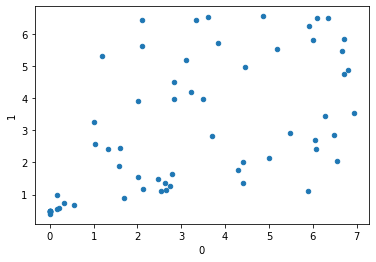

In [35]:
x_tmp = [ 5.12259e-57, 7.83501e-32, 2.12556e-07, 0.330273, 1.5845, 5.17771, 1.60797, 6.80139, 3.09313e-30, 1.00441e-18, 7.05256e-06, 0.158704, 2.12241, 3.70433, 2.47244, 1.0407, 3.98883e-06, 8.02284e-05, 0.00225265, 0.204624, 3.23089, 6.4775, 2.78258, 2.82564, 1.70305, 0.158301, 0.540798, 1.31644, 2.01008, 6.69906, 2.53886, 3.84483, 2.0991, 5.46876, 4.3982, 2.65031, 4.99893, 1.00597, 3.10659, 6.35106, 3.59832, 6.56046, 2.74138, 5.89925, 3.49831, 4.29427, 6.04229, 6.70215, 2.00169, 6.94204, 2.6289, 6.2666, 6.67513, 4.41685, 2.09548, 6.09945, 4.44611, 6.07899, 3.33199, 5.99799, 5.90773, 4.87234, 2.84288, 1.18898, ]
y_tmp = [ 0.4, 0.469043, 0.498775, 0.751798, 1.88703, 5.52432, 2.45704, 4.86785, 0.469043, 0.489846, 0.49955, 0.551715, 1.18181, 2.83071, 1.4911, 2.57603, 0.498777, 0.499565, 0.483598, 0.592211, 4.19131, 2.84853, 1.63148, 3.98616, 0.891249, 0.984506, 0.664563, 2.42974, 1.53737, 4.74364, 1.11669, 5.6974, 5.62083, 2.91426, 1.36391, 1.14273, 2.128, 3.25084, 5.19269, 6.49126, 6.51436, 2.03384, 1.25649, 1.10257, 3.96098, 1.77284, 2.69073, 5.8321, 3.89606, 3.535, 1.36465, 3.43501, 5.47738, 1.99827, 6.42277, 6.49833, 4.9631, 2.407, 6.42638, 5.80025, 6.23412, 6.54353, 4.49772, 5.3054, ]

plot_data(x_tmp, y_tmp)

Original Map before learning.

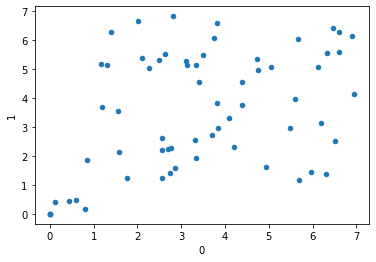

In [15]:
start_a = [ 1.57933e-05, 0.00415222, 0.603859, 2.4847, 4.19361, 1.29713, 3.84692, 6.11725, 0.00104127, 0.00333384, 0.809961, 2.76097, 6.59445, 1.5783, 6.50301, 5.05789, 0.433478, 0.121277, 0.849334, 2.69261, 2.2602, 3.82043, 6.46051, 2.6236, 4.38281, 4.39838, 3.3334, 3.34238, 3.40004, 2.56597, 4.74894, 4.08526, 6.30699, 1.7619, 6.19915, 3.69488, 2.10762, 3.13718, 2.82359, 3.10483, 3.74991, 2.7339, 5.96753, 3.5063, 3.31543, 5.47317, 1.56452, 6.32827, 5.65561, 2.85706, 2.55928, 6.94758, 5.67909, 2.01983, 2.57118, 4.72233, 1.40532, 5.5945, 1.19582, 3.81577, 1.1607, 4.94477, 6.90104, 6.6053, ]
start_b = [ 5.4271e-05, 0.00526969, 0.492371, 5.32087, 2.29128, 5.13298, 2.96817, 5.08067, 0.00358335, 0.00400131, 0.18599, 2.27628, 6.25959, 2.15034, 2.51499, 5.06712, 0.433056, 0.417865, 1.85781, 2.24007, 5.02361, 6.58317, 6.4103, 5.49946, 3.75703, 4.55037, 1.91822, 5.13946, 4.53702, 2.21607, 4.94636, 3.30613, 1.37751, 1.22427, 3.12357, 2.72761, 5.39188, 5.13763, 6.81674, 5.26451, 6.0723, 1.40294, 1.45062, 5.48692, 2.55585, 2.96626, 3.55455, 5.56477, 6.04052, 1.56924, 1.25277, 4.13469, 1.15514, 6.6631, 2.63415, 5.33552, 6.26925, 3.94938, 3.67659, 3.82017, 5.16565, 1.62296, 6.12629, 5.57322, ]
plot_data(start_a, start_b)

## Individual neuron behaviour investigation

I will investigate the behaviour of a single neuron as i change various parts to see that the behaviour is in line with literature.

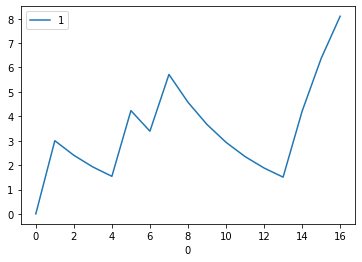

In [14]:
neuron_psp = [0, 3, 2.40221, 1.92354, 1.54025, 4.23334, 3.38979, 5.71433, 4.57568, 3.66392, 2.93384, 2.34923, 1.88112, 1.50628, 4.20614, 6.36801, 8.0991, ]
plot_data_line(range(len(neuron_psp)), neuron_psp)

## Neuron reaches maximum PSP during spike

Notice how at times __4 and 8__, the neuron passes the threshold (4 in this case) which causes the neuron to jump up as it sends out the spike. In this case, _the maximum membrane potential the neuron can reach is reached and causes a potential accross the membrane of 10"V"s_

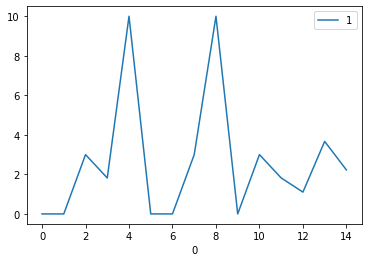

In [3]:
neuron_max_psp = [0, 0, 3, 1.81959, 10, 0, 0, 3, 10, 0, 3, 1.81959, 1.10364, 3.66939, 2.2256, ]
plot_data_line(range(len(neuron_max_psp)), neuron_max_psp)

# Inspecting Time to first spike encoding

Notice how the spike happens at time 4. The stimulus used was 4 with an alpha of 1. Because of this results, i am assuming that it could be easier to analyze the behaviour of the snn by using an alpha of 1, since it will not change how the stimulus is represented.

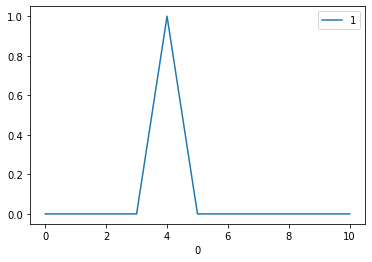

In [4]:
ttfse_strain = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ]
plot_data_line(range(len(ttfse_strain)), ttfse_strain)

## Analysis of the Euclidean distance

This will compare who has the higher chance when comparing using the euclidean distance.

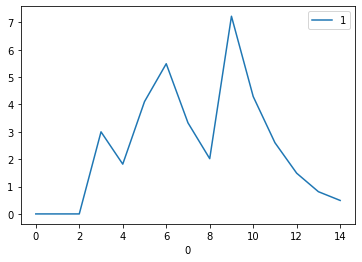

In [3]:
psp_1 = [0, 0, 0, 3, 1.81959, 4.10364, 5.48898, 3.32924, 2.01928, 7.22476, 4.29144, 2.60289, 1.48814, 0.812012, 0.49251, ]
plot_data_line(range(len(psp_1)), psp_1)

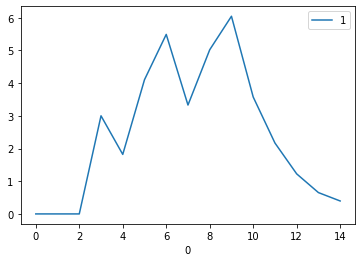

In [4]:
psp_2 = [0, 0, 0, 3, 1.81959, 4.10364, 5.48898, 3.32924, 5.01928, 6.04435, 3.57549, 2.16865, 1.22476, 0.652261, 0.395616, ]

plot_data_line(range(len(psp_2)), psp_2)

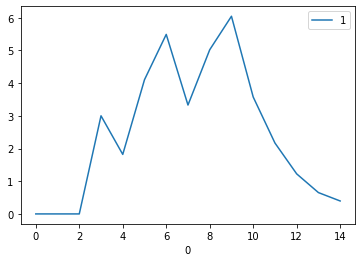

In [4]:
psp_3 = [0, 0, 0, 3, 1.81959, 4.10364, 5.48898, 3.32924, 5.01928, 6.04435, 3.57549, 2.16865, 1.22476, 0.652261, 0.395616, ]
plot_data_line(range(len(psp_3)), psp_3)

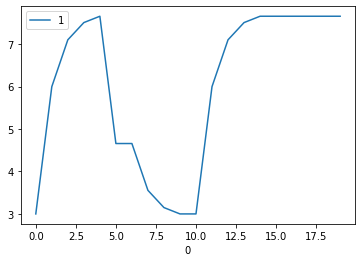

In [5]:
random_plot = [ 3.000000, 6.000000, 7.103638, 7.509644, 7.659005, 4.659005, 4.659005, 3.555367, 3.149361, 3.000000, 3.000000, 6.000000, 7.103638, 7.509644, 7.659005, 7.659005, 7.659005, 7.659005, 7.659005, 7.659005]
plot_data_line(range(len(random_plot)), random_plot)

## Testing new training algorithm
For the first version, we can appreciate no change in the delays. I am keeping this as to visualize how the delays look at first.

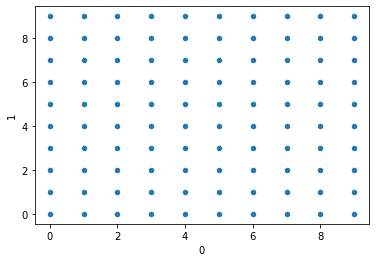

In [6]:
x_1 = [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, ]
y_1 = [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ]
plot_data(x_1, y_1)

The above result was caused by having a threshold value that was impossible to reach, showing how the network stays unchanged if it cannot change


### Using the same data 3 times
Seems like the algorithm screwed it up quite. These are old results, go towards the end of the file to see current progress.

Two datasets are used: 
 * _data_ which contains a squared path with a few turns
 * _data\_2_ which contains path followed horizontally from (0,0) to (0, 2) while waiting a bit.

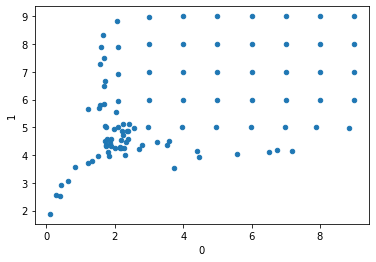

In [9]:
x_2 = [ 1.20668, 0.41205, 0.0964155, 0.264684, 1.20143, 2.00201, 2.26977, 2.30071, 2.1652, 1.88527, 1.53287, 0.823428, 0.392478, 0.64345, 1.34303, 1.80223, 2.15145, 2.31777, 2.34948, 1.98881, 2.02661, 1.78041, 1.49387, 1.74673, 1.8749, 1.7367, 1.84096, 2.38561, 2.40055, 2.24383, 2.21736, 2.22928, 2.19342, 2.374, 2.57068, 2.71604, 3.74114, 4.45436, 3.57978, 3.2305, 1.72195, 1.85541, 2.1441, 2.78953, 3.52559, 4.41506, 5.58006, 6.50916, 6.75692, 7.18296, 1.70903, 1.73411, 2.09052, 2.98083, 3.95717, 4.95185, 5.96926, 6.96417, 7.89703, 8.843, 1.56024, 1.67754, 2.08197, 2.99942, 3.99851, 4.99857, 5.99912, 6.99898, 7.99696, 8.99531, 1.69636, 1.7187, 2.08469, 2.99999, 3.99977, 4.99998, 5.99999, 6.99999, 7.99997, 8.99995, 1.55177, 1.67258, 2.08109, 3, 3.99979, 5, 6, 7, 8, 9, 1.60174, 1.66386, 2.07623, 3, 3.99981, 5, 6, 7, 8, 9, ]
y_2 = [ 5.664, 2.91879, 1.88094, 2.54742, 3.70176, 4.23691, 4.25425, 4.01347, 4.25389, 4.33557, 5.70654, 3.56206, 2.52924, 3.07909, 3.7834, 4.12046, 4.26474, 4.46743, 4.87759, 4.93591, 5.56025, 4.59281, 3.97244, 4.37781, 4.58164, 4.34011, 3.98288, 4.58334, 5.1097, 5.13358, 4.86456, 4.72392, 4.55351, 4.85619, 4.97856, 4.23495, 3.54925, 3.94458, 4.5146, 4.48169, 4.50212, 4.42251, 4.30403, 4.36262, 4.36598, 4.15196, 4.02497, 4.09635, 4.1841, 4.15224, 5.04487, 5.0224, 5.00659, 5.00912, 5.00973, 4.99866, 4.99574, 5.00038, 4.99849, 4.99191, 5.7901, 5.84921, 5.9597, 5.99617, 5.99953, 5.99954, 5.9997, 5.99981, 5.99948, 5.99915, 6.47052, 6.65414, 6.91596, 6.99294, 6.99978, 6.99999, 6.99999, 7, 6.99999, 6.99998, 7.26605, 7.50911, 7.87817, 7.98973, 7.99969, 8, 8, 8, 8, 8, 7.89819, 8.30741, 8.83897, 8.98664, 8.9996, 9, 9, 9, 9, 9, ]
plot_data(x_2, y_2)

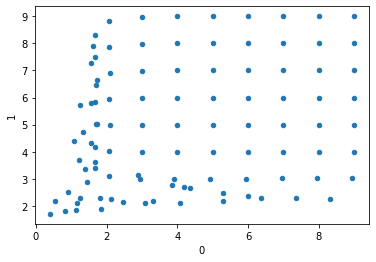

In [10]:
x_3 = [ 1.23569, 1.07241, 0.916452, 0.546614, 0.393688, 0.822291, 2.11763, 2.89149, 3.84723, 4.19431, 1.34224, 1.20645, 1.23705, 1.15935, 1.12952, 1.8377, 3.30739, 4.34962, 5.29742, 6.01222, 1.38797, 1.44885, 1.82441, 2.46301, 3.09673, 4.07304, 5.29526, 6.36398, 7.34748, 8.31383, 1.6653, 1.68335, 2.05705, 2.95218, 3.91844, 4.91817, 5.93968, 6.94679, 7.94536, 8.94325, 1.5572, 1.67457, 2.08051, 2.99851, 3.99732, 4.99751, 5.99817, 6.99839, 7.99835, 8.99829, 1.6965, 1.71876, 2.08468, 2.99998, 3.99976, 4.99997, 5.99998, 6.99998, 7.99998, 8.99998, 1.55982, 1.67705, 2.08178, 3, 3.99979, 5, 6, 7, 8, 9, 1.69635, 1.7187, 2.08469, 3, 3.99979, 5, 6, 7, 8, 9, 1.55177, 1.67258, 2.08109, 3, 3.99979, 5, 6, 7, 8, 9, 1.60174, 1.66386, 2.07623, 3, 3.99981, 5, 6, 7, 8, 9, ]
y_3 = [ 5.72725, 4.39009, 2.50188, 2.18266, 1.70289, 1.80542, 2.26788, 3.13388, 2.78753, 2.70312, 4.73374, 3.67797, 2.29252, 2.10323, 1.86516, 1.87627, 2.16929, 2.64118, 2.48902, 2.35614, 3.35027, 2.87293, 2.27392, 2.14359, 2.09685, 2.09949, 2.19441, 2.30092, 2.28103, 2.23717, 3.63098, 3.38747, 3.08451, 2.99913, 2.9859, 2.98996, 3.00531, 3.01726, 3.01674, 3.01335, 4.31041, 4.1878, 4.04138, 4.00258, 3.99892, 3.99909, 3.99981, 4.00028, 4.0003, 4.00021, 5.03631, 5.01369, 5.00069, 4.99999, 4.99998, 4.99998, 4.99999, 5, 5, 5, 5.79007, 5.84929, 5.96004, 5.99658, 5.9999, 6, 6, 6, 6, 6, 6.47053, 6.65414, 6.91597, 6.99295, 6.99979, 7, 7, 7, 7, 7, 7.26605, 7.50911, 7.87817, 7.98973, 7.99969, 8, 8, 8, 8, 8, 7.89819, 8.30741, 8.83897, 8.98664, 8.9996, 9, 9, 9, 9, 9, ]
plot_data(x_3, y_3)

# Using data_2 dataset

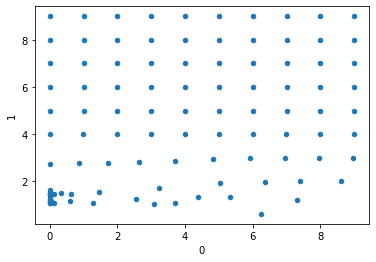

In [4]:
x_4 = [ 0, 1.55811e-08, 2.12812e-07, 1.518e-06, 0.000502386, 0.115873, 1.28189, 3.07487, 3.70542, 6.23468, 0, 4.94164e-05, 0.000297319, 0.001181, 0.0286311, 0.59907, 2.5451, 4.39014, 5.32432, 7.31901, 0, 0.133216, 0.334587, 0.624438, 1.46729, 3.21897, 5.02956, 6.35256, 7.38394, 8.62392, 0, 0.85054, 1.73254, 2.64578, 3.69051, 4.82544, 5.91531, 6.94539, 7.94902, 8.96911, 0, 0.995132, 1.99136, 2.98866, 3.9903, 4.99465, 5.99743, 6.99835, 7.99846, 8.99907, 0, 0.999946, 1.9999, 2.99987, 3.99989, 4.99994, 5.99997, 6.99998, 7.99998, 8.99999, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, ]
y_4 = [ 1.64072, 1.47697, 1.1803, 1.08523, 1.0938, 1.0899, 1.08327, 1.03214, 1.06741, 0.614341, 1.50764, 1.47493, 1.28783, 1.17727, 1.15197, 1.14615, 1.25043, 1.31821, 1.33068, 1.18667, 1.43125, 1.4763, 1.48104, 1.45146, 1.52645, 1.73441, 1.91884, 1.98769, 1.99916, 1.99998, 2.74998, 2.75323, 2.78276, 2.80356, 2.86722, 2.93999, 2.97902, 2.99118, 2.99356, 2.99657, 3.98711, 3.98707, 3.98866, 3.98994, 3.99342, 3.99709, 3.99894, 3.9995, 3.99961, 3.99979, 4.9998, 4.9998, 4.99983, 4.99985, 4.9999, 4.99996, 4.99998, 4.99999, 4.99999, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ]
plot_data(x_4, y_4)

## Small distance between neurons

Here I demonstrate the phenomenom of angular spiking.

When neurons are allowed to spike, a phenomenom occurs where all neurons placed as in a diagonal on the expected winning neuron spike at some point. This is due to the fact that when spiking, we are really looking at the synchrony reached via delays. For example, lets say that we have as stimulus (2, 5). We obviously expect that the neuron closest to (5, 2) delay vector will spike (Notice the inverted point, this is because that configuration allows synchronization: (7, 7) arrival times vs (10, 4) when non inverted). Because of this, any configuration of delays where the difference between the two points is the same will spike. 
Take as an example (following with (2, 5)) (7, 4). The distance between (5, 2) is 3 (sqrt((5-2)^2)). The distance between (7, 4) is also 3. If we were to run a simulation where the respective neurons that have both delay configuration were allowed to spike, we will see that (5, 2) spikes at time 7, and (7, 4) spikes at time 11, following equation sqrt((x + y)^2) for spike time. This causes the spike diagonal problem. How can we identify which neuron is really the one that shall be called winning? 

I answer this problem by suggesting distance checking between the goal stimulus and the spiking neuron's delay vectors after inverting to have same orientation: sqrt( (x_n - y_goal)^2 + (y_n - x_goal)^2 ). The closest neuron is the one that will be called "winner", if following a hebbian learning strategy.

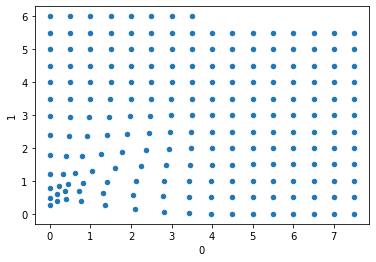

In [21]:
p_1 = [0, 0.17058673843487143, 0.38930157598113313, 0.76722491060446396, 1.3656231667615226, 2.0948154257970244, 2.8051821381158275, 3.428391242793507, 3.9797250534324329, 4.4955664182866002, 4.9992505729209977, 5.4999020245016972, 5.9999900880304917, 6.4999992235550934, 6.9999999528784249, 7.499999997783223, 0, 0.17058673843487143, 0.36618464287025243, 0.71806357384319075, 1.3102562505377726, 2.0535842449139317, 2.7832866779146186, 3.419806287376479, 3.9771932062232831, 4.4949986776194217, 4.9991531229096102, 5.4998891652936353, 5.9999887797193292, 6.4999991207177628, 6.9999999466243468, 7.4999999974886356, 0, 0.22359219956221477, 0.45597494496156854, 0.82572376886014898, 1.4046220396688147, 2.1133295661411053, 2.8113471768588858, 3.4298682847928466, 3.9799877479240355, 4.4956018540987497, 4.9992542381877882, 5.4999023166019105, 5.9999901060080525, 6.4999992244107956, 6.999999952909957, 7.4999999977841227, 0, 0.31372781451082099, 0.62813707460826618, 1.0406605625032754, 1.5962653724992331, 2.237785609980087, 2.8716846909076712, 3.4521378342990161, 3.9863070222836376, 4.4969854970255243, 4.9994883047173175, 5.4999329317001395, 5.9999932041784447, 6.499999467146389, 6.9999999676429079, 7.4999999984772625, 0, 0.40279282350723083, 0.8032935413429646, 1.2568892554782145, 1.7865759674750796, 2.3612099017886097, 2.9318889831564441, 3.4745232073765191, 3.9926962376061566, 4.4983899118983546, 4.9997264672748658, 5.4999641294613442, 5.9999963642151011, 6.4999997148676103, 6.9999999826835779, 7.4999999991850252, 0, 0.46102707081708127, 0.91990945049751982, 1.4003659557916368, 1.9122128316413907, 2.4427187766974852, 2.9718011036337812, 3.4894264242982436, 3.9969636653751039, 4.4993299391644532, 4.9998860908406026, 5.4999850561989883, 5.9999984849495371, 6.4999998811662749, 6.9999999927824419, 7.4999999996602966, 0, 0.4879030504028477, 0.97473657087126786, 1.4682668623849195, 1.9718674961193634, 2.4815639399997989, 2.9908961096253011, 3.4965792198545826, 3.9990163580255706, 4.4997827473891743, 4.9999630485042816, 5.4999951508005065, 5.9999995082792914, 6.4999999614271999, 6.9999999976570546, 7.4999999998897211, 0, 0.49706883839528937, 0.99378579631516917, 1.4921172387957728, 1.992967005637708, 2.4953718731603667, 2.9977084173647612, 3.4991374614120416, 3.9997517128393492, 4.4999451259364776, 4.9999906629870567, 5.4999987743916039, 5.9999998757019215, 6.4999999902486199, 6.9999999994076605, 7.4999999999721183, 0, 0.49944344672102559, 0.9988046315277157, 1.4984705566617076, 1.9986278497570797, 2.4990938645570537, 2.9995503437525985, 3.4998305204829467, 3.9999511732698667, 4.4999892032450175, 4.9999981623208223, 5.4999997587341323, 5.9999999755286106, 6.4999999980800469, 6.9999999998833697, 7.4999999999945102, 0, 0.49991715075069837, 0.99982012030842426, 1.499768212423245, 1.9997911099342469, 2.499861663724614, 2.9999312324926364, 3.4999740530281596, 3.9999925198128863, 4.4999983452898205, 4.9999997182887892, 5.4999999630091283, 5.9999999962477109, 6.4999999997055902, 6.9999999999821148, 7.499999999999158, 0, 0.49999033844935237, 0.99997883720924019, 1.4999725744900434, 1.9999751948272062, 2.4999835362071221, 2.9999918045285465, 3.4999969051279298, 3.9999991073291947, 4.4999998024684684, 4.9999999663642551, 5.499999995582856, 5.9999999995519007, 6.4999999999648406, 6.9999999999978639, 7.4999999999998996, 0, 0.49999911825088589, 0.99999805480470993, 1.4999974676983354, 1.9999977031358123, 2.4999984728396747, 2.9999992389800663, 3.4999997124255744, 3.9999999170201241, 4.4999999816336169, 4.9999999968721029, 5.4999999995891979, 5.999999999958324, 6.4999999999967297, 6.999999999999801, 7.4999999999999902, 0, 0.49999993708065626, 0.99999986040235056, 1.4999998176139375, 1.9999998342011334, 2.4999998896104492, 2.999999944943982, 3.499999979184738]



q_1 = [0.26763071425949514, 0.38940039153570244, 0.44124845129229773, 0.38940039153570244, 0.26763071425949514, 0.14325239843009505, 0.05971648413335981, 0.019387103915861004, 0.0049018275179109139, 0.00096522706811385465, 0.00014802236502842769, 1.7678750425204991e-05, 1.6443799406832421e-06, 1.191184833750909e-07, 6.7202049755675108e-09, 2.9526519994720197e-10, 0.49791611784688328, 0.61183518972716922, 0.68309232143512622, 0.68060297590669472, 0.63082939249075987, 0.57304308266196124, 0.53154875460407613, 0.51051222215120073, 0.50270364904703158, 0.50053804307236049, 0.50008304360491229, 0.50000995676629967, 0.50000092830319676, 0.50000006734183, 0.50000000380244325, 0.50000000016715507, 0.77789778698327072, 0.83658479066013203, 0.89722339625386627, 0.93988290410913511, 0.9699417340939025, 0.98858422488653719, 0.99683220975298847, 0.99934947099953142, 0.99989876449891979, 0.99998786131228046, 0.99999887000258614, 0.9999999181325907, 0.9999999953812827, 0.99999999979706744, 0.999999999993056, 0.99999999999981493, 1.209328152288397, 1.208814157791958, 1.245470941768716, 1.3082912767627706, 1.381138749960146, 1.441127203590149, 1.476884844765785, 1.4928121919391844, 1.4982341068559071, 1.4996585558906881, 1.4999482255997005, 1.4999938590611221, 1.4999994312093146, 1.4999999589026387, 1.4999999976850622, 1.4999999998983851, 1.7795334278294679, 1.7544236924590182, 1.7689133163651041, 1.8191047390677144, 1.8850318050771766, 1.9416675337118199, 1.9765611222493331, 1.9925739497410822, 1.9981514003710861, 1.9996394924825791, 1.9999450412948738, 1.9999934598165885, 1.999999393005274, 1.9999999560881982, 1.9999999975246758, 1.9999999998912954, 2.3857691859628267, 2.3648518382187662, 2.3674412678621057, 2.3936597437860878, 2.4313085388636879, 2.4646872435091889, 2.4856587391391849, 2.4954205546055528, 2.4988540104559287, 2.4997757663452806, 2.4999657453851829, 2.4999959184873619, 2.499999620902805, 2.4999999725621325, 2.4999999984528771, 2.4999999999320459, 2.9569094414038237, 2.9468054063329472, 2.9461781794255066, 2.9559208286857004, 2.9711257928472228, 2.9850088449542582, 2.9938692183035371, 2.9980331298006138, 2.9995063161409399, 2.999903220752147, 2.9999851987021766, 2.9999982351552505, 2.9999998360085023, 2.9999999881277293, 2.99999999933046, 2.9999999999705889, 3.4877623535936366, 3.4843836962849362, 3.4838047853722132, 3.4865087180413816, 3.4910612333655315, 3.4953239039925217, 3.4980782065220435, 3.4993815090338036, 3.4998444536364737, 3.4999694705884457, 3.4999953274175253, 3.4999994426100098, 3.4999999481924768, 3.4999999962487376, 3.4999999997884252, 3.4999999999907057, 3.9973393491829046, 3.9965128008363182, 3.9963122716699546, 3.9968867114993332, 3.997919089729673, 3.9989052704857073, 3.9995484807018267, 3.9998543649493983, 3.9999633236854963, 3.9999927954431564, 3.9999988967674165, 3.9999998683551552, 3.9999999877617509, 3.9999999991137556, 3.9999999999500111, 3.999999999997804, 4.4995537926061209, 4.4994023791213138, 4.4993582727018602, 4.4994526596347635, 4.4996317315365602, 4.4998054490892327, 4.4999195487038355, 4.4999740092072411, 4.4999934481160828, 4.49999871220058, 4.4999998027274977, 4.4999999764549461, 4.4999999978108596, 4.4999999998414584, 4.4999999999910569, 4.4999999999996074, 4.9999420818177525, 4.9999210632439492, 4.9999142186948973, 4.9999262603839032, 4.999950137483645, 4.9999735760630708, 4.9999890520050965, 4.9999964589273418, 4.9999991067041192, 4.9999998243417618, 4.99999997308446, 4.9999999967870288, 4.999999999701239, 4.9999999999783622, 4.9999999999987796, 4.9999999999999467, 5.4999941718755849, 5.4999919451396861, 5.4999911647524904, 5.4999923592738371, 5.4999948137881871, 5.4999972451808574, 5.4999988569706186, 5.4999996299661866, 5.4999999066023593, 5.4999999816282088, 5.4999999971843891, 5.4999999996638529, 5.4999999999687406, 5.4999999999977351, 5.4999999999998721, 5.4999999999999947, 5.9999995449657826, 5.9999993640863583, 5.9999992973930292, 5.9999993895742332, 5.9999995844722571, 5.9999997788863189, 5.9999999081553756, 5.9999999702472531]





plot_data(p_1, q_1)

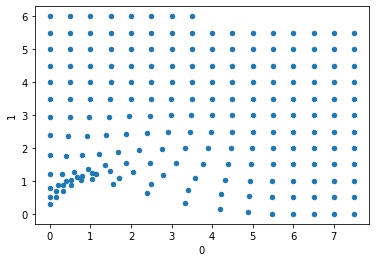

In [23]:
p_1 = [0, 0.15904353615362479, 0.32610771738674865, 0.53455219501601814, 0.76304405937911757, 1.0474077128985122, 1.5673998640794022, 2.3886790416712262, 3.333711274430093, 4.1913620410226891, 4.8894247026263917, 5.4693528282262669, 5.9934276255171159, 6.4989089701446447, 6.9998597243384939, 7.4999860228338315, 0, 0.16039989817576383, 0.31372781451082099, 0.52588770669181184, 0.80004195356626251, 1.1474433772473966, 1.6994737557785615, 2.5045610880567994, 3.4074507404119183, 4.226573160407888, 4.9022340218244604, 5.4729296572377386, 5.9941974281407644, 6.4990369754752315, 6.9998761953723143, 7.4999876646390842, 0, 0.21441541686552532, 0.41108154982980721, 0.67384036953502457, 1.028702039927621, 1.4724299781702164, 2.0589443238847269, 2.7989792708422234, 3.588134720556091, 4.3110911180951037, 4.9326414317864611, 5.4813732914472046, 5.9960097712785494, 6.4993379522904151, 6.9999149000011212, 7.4999915215488491, 0, 0.30683569542983169, 0.59503449431713162, 0.93820145516254605, 1.367596529357809, 1.8745343001305645, 2.4603089714001611, 3.1122547123052171, 3.7762301877765325, 4.3981936203814058, 4.9638313694154208, 5.4900150040191251, 5.9978626834250264, 6.499645513673376, 6.9999544421013287, 7.4999954614754607, 0, 0.39910411955606478, 0.78564641383991574, 1.2053033790750534, 1.6798879320603122, 2.2014323963687819, 2.7568068812130098, 3.3319200910284161, 3.9049828228210912, 4.4571944692948273, 4.9848617371262041, 5.4958296986452426, 5.9991082305631078, 6.4998521651023546, 6.9999810048143276, 7.4999981078812912, 0, 0.45965638723193325, 0.91334854870902205, 1.381706711460432, 1.8751405627651163, 2.3890559903212809, 2.9141864868203626, 3.4429313920836564, 3.9684568530507631, 4.485952942276076, 4.9950600654482376, 5.4986427979262977, 5.9997101500661598, 6.4999519787697011, 6.9999938315703556, 7.4999993856438723, 0, 0.48753628411867322, 0.9729788463793525, 1.4633203102352881, 1.9622017417652113, 2.4677800973903565, 2.9762352527719269, 3.4847993371238406, 3.9918050055369814, 4.4964001725180198, 4.9987428194133976, 5.4996557741384873, 5.9999266057914884, 6.4999878498044623, 6.9999984398586799, 7.4999998446420566, 0, 0.49699526109024816, 0.99343291570489989, 1.4911273828191567, 1.9910433399380087, 2.492642571255816, 2.994814948058008, 3.4968161678574043, 3.9983314522252553, 4.4992790334164381, 4.9997503843056013, 5.4999319471205323, 5.9999855203500427, 6.4999976053286863, 6.9999996926589727, 7.4999999694020403, 0, 0.49943210937232485, 0.99875024223584308, 1.4983181109816204, 1.998332008135947, 2.4986746882594639, 2.9991063432166944, 3.4994744680790384, 3.999733358388986, 4.4998870536481377, 4.9999613143363266, 5.4999895104383585, 5.9999977740640622, 6.499999632340729, 6.999999952841935, 7.4999999953064371, 0, 0.49991579541322029, 0.99981361782947153, 1.4997499896161159, 1.9997557561263117, 2.4998115848741147, 2.9998781974570843, 3.4999315268887221, 3.9999665052662268, 4.4999861452354724, 4.9999953174232568, 5.4999987390246989, 5.9999997333202648, 6.4999999560242578, 6.9999999943638169, 7.4999999994392477, 0, 0.49999021236487312, 0.9999782322884686, 1.4999708792739834, 1.999971906108114, 2.4999788779213343, 2.9999868714022009, 3.4999929495549655, 3.99999668759544, 4.4999986676862775, 4.9999995570199749, 5.4999998817345688, 5.9999999750958386, 6.4999999959018435, 6.9999999994752811, 7.4999999999478195, 0, 0.49999910911719647, 0.99999801098355412, 1.4999973448952579, 1.999997464899119, 2.499998135392568, 2.9999988816247067, 3.4999994258845999, 3.9999997417351634, 4.499999899430267, 4.9999999672193027, 5.4999999913420554, 5.9999999981867331, 6.4999999997024069, 6.9999999999619451, 7.4999999999962172, 0, 0.4999999365653679, 0.99999985793012569, 1.4999998106858512, 1.9999998207607246, 2.4999998705729753, 2.9999999247833675, 3.4999999630192011]



q_1 = [0.30568821141890029, 0.49838586863184908, 0.69427471943559993, 0.87783941306308222, 1.0320359786588369, 1.0716261992150475, 0.91586358057748929, 0.62003832716449203, 0.32875859967713322, 0.13623519566540115, 0.04408170416402233, 0.011126577092078874, 0.0021891336995903108, 0.00033558172640598723, 4.0072017463303127e-05, 3.7269484367284426e-06, 0.52703717416052565, 0.69473151159431512, 0.87174250490055305, 1.0337141438566384, 1.1639849631340335, 1.2026856124982022, 1.1033642445123388, 0.90914490001766302, 0.71719494248167359, 0.59008063923180654, 0.5291620895037058, 0.50736264923681496, 0.50144876800934413, 0.50022210087940455, 0.50002652192801389, 0.50000246673706583, 0.79418174739809988, 0.88433425858897508, 1.0057981904636877, 1.134880546515447, 1.2456169635272483, 1.2953115635482038, 1.2653107219789157, 1.1834088497078317, 1.0983645693270707, 1.0410308588263122, 1.0133234337274695, 1.0033688919079427, 1.0006633855998601, 1.0001017339815934, 1.0000121504086859, 1.0000011301645184, 1.2149673163789065, 1.2261952977083952, 1.2852343305922016, 1.3763940384857691, 1.4697921083238019, 1.5318469197371085, 1.5518223454082178, 1.5427477924033837, 1.5246769748803963, 1.5106502903001233, 1.5035146533380286, 1.5008955109189679, 1.5001769750084955, 1.5000271860973404, 1.5000032495094908, 1.500000302365172, 1.7801888989084491, 1.7566726359432929, 1.7739899365051639, 1.8265291326900626, 1.8918973014651264, 1.9456147541353204, 1.9779608096206345, 1.9928787334037243, 1.9981920112706819, 1.9996427939453321, 1.999945204693077, 1.9999934647329725, 1.9999993930951228, 1.999999956089195, 1.9999999975246825, 1.9999999998912954, 2.3853968311024913, 2.3637670940522875, 2.3648206337658038, 2.3884144053713077, 2.4229467154009394, 2.4544787772223353, 2.4762432226958473, 2.4888192993144953, 2.4952961253101358, 2.4982898786771872, 2.4994831649146074, 2.4998738956725646, 2.4999755930080076, 2.499996287762531, 2.4999995583663006, 2.4999999589976176, 2.9566759099304076, 2.9460936741549451, 2.9444719537544972, 2.9527003567461971, 2.9663655017124912, 2.9795376150298907, 2.9889974428200521, 2.9946707826346497, 2.9977039248239357, 2.9991515739065155, 2.9997411546926362, 2.9999365303621066, 2.9999876855948653, 2.9999981248011656, 2.9999997767878352, 2.9999999792709002, 3.4876908579447972, 3.4841639742996025, 3.4832779052939067, 3.4855225827025573, 3.4896220207028721, 3.4936884001131268, 3.4966322208869571, 3.4983868340113888, 3.4993118780773638, 3.4997474415599386, 3.4999232439030239, 3.499981216993338, 3.4999963593545567, 3.4999994458825996, 3.4999999340565635, 3.4999999938766901, 3.9973246295916205, 3.9964674800658542, 3.9962035637130775, 3.9966835598581891, 3.997623353020876, 3.9985699914782247, 3.9992525028067241, 3.9996509113964507, 3.9998544169128274, 3.9999473956769371, 3.9999841575763315, 3.9999961417022285, 3.9999992539402363, 3.9999998865785811, 3.999999986509601, 3.9999999987476511, 4.4995515925659708, 4.4993956029310747, 4.4993420177533618, 4.4994222902461019, 4.4995875411710236, 4.4997553713648619, 4.4998753532500508, 4.4999436334839658, 4.4999771890366267, 4.4999919343936083, 4.4999976022947807, 4.4999994200983888, 4.499999888257757, 4.4999999830409463, 4.4999999979845215, 4.4999999998129709, 4.9999418362159247, 4.9999203067423608, 4.9999124039460687, 4.9999228699731306, 4.9999452044258161, 4.9999679861325488, 4.999984118883277, 4.9999930684372336, 4.9999972919039388, 4.9999990678203119, 4.9999997274778929, 4.9999999346879633, 4.999999987473208, 4.9999999981031333, 4.9999999997748157, 4.9999999999791145, 5.499994151118659, 5.4999918812038944, 5.4999910113785333, 5.4999920727334652, 5.4999943968741132, 5.499996772754991, 5.4999984400560633, 5.4999993434252188, 5.4999997532280194, 5.4999999176922705, 5.4999999764274285, 5.4999999944156714, 5.4999999989353121, 5.4999999998392539, 5.4999999999809441, 5.4999999999982343, 5.9999995436274656, 5.9999993599640513, 5.9999992875041297, 5.9999993710993369, 5.9999995575914404, 5.9999997484263607, 5.9999998812745563, 5.9999999517723541]





plot_data(p_1, q_1)

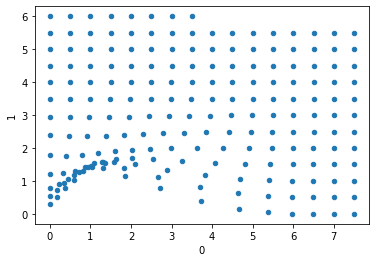

In [24]:
p_1 = [0.0049018275179109139, 0.17534724650692948, 0.36635019518901651, 0.60122870942399664, 0.82646074701551486, 1.0289471309340195, 1.3170355527909057, 1.8479268791270267, 2.7091384591789307, 3.7341917743874253, 4.6571619340841055, 5.382705020508797, 5.9689507045736594, 6.4936012743615672, 6.9989716109122586, 7.4998711112031664, 0.005554498269121153, 0.17884462514779262, 0.36016623481111459, 0.60284856960552624, 0.86068229647541461, 1.0823842153836769, 1.3497368778892809, 1.8406758380770825, 2.677354397508064, 3.7028156915885635, 4.6381790485248811, 5.3746662505116261, 5.9664571671705069, 6.4930224282040259, 6.9988698282545201, 7.4998574526696666, 0.0049018275179109139, 0.22964562681345171, 0.44624968911523838, 0.72056351887020575, 1.0210204924810873, 1.2884655596975307, 1.5916867809658219, 2.0984560384116491, 2.8954703766938654, 3.8367693740073952, 4.6977979121229918, 5.3944924417601534, 5.9715201931019442, 6.494029842442159, 6.9990267784076536, 7.4998766098209737, 0.0033689734995427335, 0.31607179694112048, 0.61165529080548398, 0.94428588265710833, 1.2999809264594526, 1.6404820607421939, 2.0174478894963528, 2.5469504749529874, 3.2655711827552727, 4.0636216211526524, 4.8011458231635054, 5.4301875805772237, 5.9810250164902143, 6.4959971026508123, 6.999344041629092, 7.4999164838290131, 0.0018032815680078652, 0.40338977925286795, 0.79035543348344317, 1.1944839705978327, 1.6129489962337564, 2.0293243240373373, 2.4716310368840442, 2.9978669450412698, 3.6189703057805365, 4.2750016611832065, 4.8973204343049188, 5.4637649154269923, 5.9900934308344569, 6.4978992380273164, 6.9996542795391337, 7.4999558341762214, 0.00075171959648878618, 0.46126288751628342, 0.91414208705453714, 1.3733212002379089, 1.83922260681997, 2.3061064503149118, 2.7846580016395976, 3.297048118369406, 3.8466239647018758, 4.4093719007565229, 4.9584740266994611, 5.4852678439834985, 5.995951769969591, 6.4991378628702607, 6.999857631921091, 7.499981763338333, 0.0002440476217617075, 0.48803092796866809, 0.97305918320567797, 1.4600158555952949, 1.9493808378284554, 2.439324092116617, 2.9328203942092879, 3.4366262741649583, 3.9519405541350059, 4.4714634375678886, 4.9868541224349654, 5.4953125845880937, 5.9987063855943621, 6.4997235433451808, 6.9999542222725317, 7.4999941235166787, 6.1704902043339781e-05, 0.49711801820051393, 0.99343785231085635, 1.490241741862175, 1.9877045411888592, 2.4853258948256292, 2.9837347518818027, 3.4845772056586362, 3.9882301530198632, 4.4929688480341614, 4.9967436935606555, 5.498833749430748, 5.9996769967332915, 6.4999307780718194, 6.9999885127000292, 7.4999985228749848, 1.2150415629664731e-05, 0.49945616457579339, 0.99875042722794305, 1.4981411646016627, 1.9976697244499158, 2.4972281268840586, 2.9969198295316497, 3.4970619076663891, 3.9977433646298812, 4.4986442885734661, 4.9993692306025563, 5.4997732597253046, 5.9999370220129595, 6.4999864732687804, 6.9999977513773954, 7.4999997104683702, 1.8633265860393355e-06, 0.49991948083357818, 0.9998136220603403, 1.4997227760378138, 1.9996540467897577, 2.4995895792162246, 2.9995427552592822, 3.4995614811117028, 3.9996613061202702, 4.4997955556426783, 4.9999045176700259, 5.4999655758357573, 5.9999904166878313, 6.4999979380150963, 6.9999996567582929, 7.4999999557579153, 2.2254262502097095e-07, 0.49999065246006597, 0.99997823234748362, 1.4999676276389609, 1.9999597560338369, 2.4999523601691083, 2.9999468063678085, 3.4999487528035456, 3.9999602363887981, 4.4999759049240478, 4.9999887125244342, 5.4999959209554703, 5.9999988623827187, 6.4999997548850175, 6.9999999591540512, 7.4999999947308282, 2.0699688593925834e-08, 0.49999915005169765, 0.99999801098405572, 1.4999970424300773, 1.9999963347372807, 2.499995668825723, 2.9999951549736186, 3.4999953149356924, 3.9999963512413448, 4.4999977821628203, 4.9999989585239861, 5.4999996229322017, 5.9999998946882904, 6.4999999772843502, 6.9999999962114865, 7.4999999995109619, 1.4994804124286536e-09, 0.49999993953064831, 0.99999985793012824, 1.499999788775239, 1.9999997388918827, 2.4999996918952658, 2.9999996548255274, 3.499999665222997]



q_1 = [0.31399343556808801, 0.52749781783820882, 0.77224804243495071, 1.0385916085655189, 1.2910928810678657, 1.4331353207321962, 1.394237096637249, 1.1573959428709018, 0.77603412934558091, 0.40322397399592924, 0.16088226804345965, 0.049685072817488907, 0.011982057979603101, 0.0022657119500678054, 0.00033611081596536215, 3.9084383399347163e-05, 0.53521874362713084, 0.72340625906221812, 0.94808902873211043, 1.1905676875418472, 1.4175193390540317, 1.5544993511764373, 1.5516821222561694, 1.3904830234691739, 1.1062252413913201, 0.81894753885665716, 0.62869022210978764, 0.54015360333896534, 0.50977246823362554, 0.50186247629619118, 0.50027811445038295, 0.50003251566069529, 0.80009246049030314, 0.90596378625307672, 1.0651684270482205, 1.2588109831556422, 1.4475130344036975, 1.5697175166132151, 1.5894912280867755, 1.5013897633561917, 1.3396699036397344, 1.1784054883198913, 1.072244289242041, 1.0226906827663031, 1.0055619613159827, 1.0010668628533146, 1.000160170975182, 1.0000188088949638, 1.217612070686301, 1.2365058961237445, 1.3145701000870762, 1.4377916857603139, 1.567318399771066, 1.6571390629906488, 1.6877390896622251, 1.665122527319197, 1.612107759308856, 1.5588296258489678, 1.5238916528367954, 1.507545852974234, 1.5018608655341532, 1.5003588631701061, 1.5000541162711574, 1.5000063775693129, 1.7805852802154911, 1.7584080751619755, 1.7789550310841613, 1.8356709801393334, 1.9025406431964242, 1.9534055710446461, 1.9815383483882552, 1.9938988719235009, 1.9983700183154021, 1.9996616185659175, 1.9999464084619585, 1.9999935113432612, 1.9999993941895431, 1.9999999561047872, 1.9999999975248173, 1.9999999998912961, 2.3851071207521271, 2.3626855749481037, 2.3614796722721971, 2.3798815363977206, 2.4055879251251051, 2.4273389025333891, 2.4440169669793175, 2.4596287293829011, 2.4749679344278834, 2.4873432140148597, 2.4949089882748186, 2.498387716255317, 2.4995997515569774, 2.4999222771295111, 2.4999882083938849, 2.4999986034356363, 2.9564424354497922, 2.9451804789316793, 2.9416639359924392, 2.9459055863792898, 2.953489117553675, 2.9605472174978114, 2.9672706853205999, 2.9753869968096409, 2.9844099703211873, 2.992025508026142, 2.9967688155896299, 2.9989713645566054, 2.9997436409784051, 2.9999500690652492, 2.9999924071898727, 2.9999990990977623, 3.4875990601261369, 3.4838017676113702, 3.4821628962254585, 3.4828437672103103, 3.4846035235907888, 3.4863665972102678, 3.4883191798065294, 3.4910420001959563, 3.4942607360925715, 3.4970429746419067, 3.4987957222073529, 3.4996151501446433, 3.4999038022261373, 3.4999812202658878, 3.4999971390668074, 3.4999996600627541, 3.9973003612672238, 3.9963715381719562, 3.9959080809404983, 3.9959745630947721, 3.9962981492342009, 3.99664091762493, 3.9970658292602765, 3.9977207942099922, 3.9985277330601958, 3.9992372399672163, 3.9996881151913075, 3.9999000302355809, 3.9999749531180417, 3.9999951014614603, 3.9999992526880868, 3.9999999111051689, 4.4995469350850348, 4.4993771833862199, 4.4992852827773326, 4.4992861857426121, 4.4993332476709229, 4.4993853516628004, 4.4994560458723356, 4.4995735859148995, 4.4997228558960183, 4.499855798870497, 4.499940852437005, 4.499980996103643, 4.4999952299414998, 4.4999990657640536, 4.4999998573155535, 4.4999999830124588, 4.9999411686009934, 4.9999176662930367, 4.9999042708109966, 4.9999033595282762, 4.999908753844716, 4.9999149504472387, 4.9999240212553282, 4.9999400323084995, 4.9999608406899547, 4.999979556879893, 4.999991594106076, 4.9999972941685522, 4.9999993198453359, 4.9999998666394099, 4.9999999796142012, 4.9999999975712726, 5.4999940786698698, 5.4999915946635616, 5.4999901287723905, 5.4999899554707525, 5.4999904413039831, 5.4999910174305056, 5.4999919184159189, 5.4999935880965056, 5.4999957976518363, 5.4999978004248122, 5.4999990938190253, 5.4999997078746743, 5.4999999264864021, 5.4999999855732176, 5.4999999977931768, 5.4999999997369429, 5.9999995376295443, 5.9999993362418147, 5.9999992144344985, 5.9999991958144001, 5.9999992301160505, 5.9999992719524569, 5.9999993413588717, 5.9999994752984263]





plot_data(p_1, q_1)

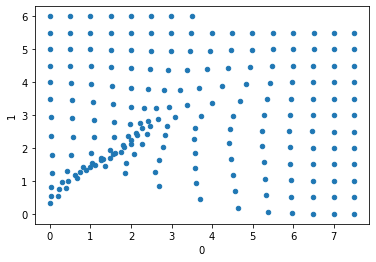

In [28]:
p_1 = [0.010929062249103984, 0.19249831114029167, 0.40378117889601162, 0.66262579481448902, 0.90441038822358533, 1.1067192888134738, 1.3702698028619682, 1.857372038066742, 2.6801136590539758, 3.695414649227009, 4.6303670571439728, 5.3701125853598306, 5.9645328395162229, 6.4924026419602727, 6.9987178290206487, 7.4998291924418341, 0.020072233825244482, 0.22019153995155635, 0.45120331053948232, 0.75194141576690088, 1.0453358799092229, 1.2628851667833509, 1.4761573620447925, 1.8660818609048131, 2.6033405186272449, 3.5970549578062299, 4.5618198524442892, 5.3377319225237834, 5.9532602082373369, 6.4894004543437918, 6.9980973776385165, 7.4997292791257397, 0.03218460446678767, 0.3053668163462479, 0.60921596511999765, 0.97883992443012047, 1.3208097566841257, 1.5530588381853769, 1.7438015723130582, 2.0673037885457197, 2.6916575569473742, 3.5879652539978286, 4.5215724583432042, 5.3087359225297286, 5.9405789697184881, 6.4854694692539931, 6.9971909693290559, 7.4995709019950665, 0.043376733077913204, 0.42196440009912084, 0.82638803122546167, 1.2585603415953326, 1.614651741548073, 1.8360688274342254, 2.007802423980416, 2.2790908177791396, 2.7940897625473728, 3.5834747105144631, 4.476397312811331, 5.2732800175817092, 5.924188262622839, 6.4801869415129003, 6.9959392021841449, 7.4993479112784209, 0.047586942540350015, 0.51872534759072975, 1.0063571905023427, 1.472283793783721, 1.8147151819840113, 2.0107381171250238, 2.1609080006534112, 2.388471174324045, 2.8280762320825024, 3.5533974864663671, 4.4277406157035513, 5.2388304904626928, 5.9084575360573579, 6.4751005713479906, 6.9947284182531142, 7.4991314710091315, 0.04165562951274978, 0.56118737893491788, 1.0901312374952328, 1.5720964564632913, 1.9177650525934884, 2.1191677235255857, 2.2677044985730461, 2.4749591020106338, 2.8839956024255406, 3.5784472964181542, 4.430190260086837, 5.2334998530411587, 5.9043945677129077, 6.4734851355173859, 6.9943007652823725, 7.499050201627746, 0.028794392417220045, 0.55719314631507844, 1.0921167123482209, 1.5856550309518249, 1.9682387217591049, 2.2241726184613761, 2.4171427274754937, 2.6550655862927099, 3.0745091406342162, 3.7357360073217536, 4.5248828506769039, 5.2755123889736906, 5.9185817748996392, 6.4772111428897867, 6.9950674382349476, 7.4991737863997372, 0.015642775759805386, 0.53508597063655394, 1.0591884670759515, 1.5592923023889318, 1.9905030392694183, 2.3317650387732995, 2.6172499075324454, 2.9325179829925299, 3.3793818062850831, 3.9897199234181175, 4.6824279656994436, 5.3491824380904545, 5.9449817958281308, 6.4845264151044919, 6.9966390726458343, 7.4994356582152015, 0.006666390309169979, 0.51587899695789663, 1.0277304968315049, 1.5293112782839955, 1.9979243514708036, 2.4179395306677613, 2.8031043058948009, 3.2025801614189877, 3.6739614468041299, 4.2320089186171108, 4.8328561305675359, 5.4203155545780453, 5.9708211460081575, 6.4917697652747144, 6.9982087654023406, 7.4996988244865621, 0.002228074368402738, 0.50550367056969348, 1.0098995225733356, 1.5109091470118889, 1.9996682065390279, 2.4685604075043859, 2.9216325372272434, 3.3794607780767136, 3.8668384108031102, 4.3900705689900246, 4.9311692374448741, 5.4670671869829821, 5.9879063591229311, 6.496582063127307, 6.9992551447699061, 7.4998746556835867, 0.00058440591738686339, 0.50148403741063108, 1.0027450606334702, 1.503133865549598, 1.9999602389205455, 2.4905507381604393, 2.9757541941348791, 3.4620549037903632, 3.9576502274514547, 4.4648106140006609, 4.9778655237628238, 5.4893747278967133, 5.9960894004712531, 6.4988931577240612, 6.9997585673662162, 7.4999593480855768, 0.00012043201396656032, 0.50031372742999658, 1.0005970603335697, 1.5007043521781773, 1.9999963448782123, 2.4977661710091623, 2.9941328601673081, 3.49067403852239, 3.9894860221439044, 4.4912065470089733, 4.9944452082444597, 5.4973261101457842, 5.9990141363280056, 6.4997206542300283, 6.9999390250298417, 7.4999897287967245, 1.9525780808790528e-05, 0.5000522146898011, 1.0001023655387993, 1.50012465957329, 1.9999997390232349, 2.499584187022228, 2.9988865486517944, 3.4982066129147524]



q_1 = [0.3191349536920271, 0.54158284427124093, 0.80134412311961789, 1.0837643774038743, 1.3453125201739038, 1.4918603730564797, 1.4608409100219015, 1.231697979199345, 0.84551774727175766, 0.45225298437820072, 0.18656008696443643, 0.059918410836358592, 0.015160160856299877, 0.0030426393047275724, 0.00048568321858019311, 6.1697228275761807e-05, 0.54602903122283741, 0.7531413445891707, 1.0094600682151103, 1.2861016610766094, 1.5338926773004795, 1.6831747054478814, 1.6985580365229458, 1.5553449765637493, 1.2636036540125779, 0.93334440972095178, 0.69034974486998735, 0.56528883851088019, 0.51770377278009783, 0.50382189405947042, 0.50065788141651668, 0.50009017219488727, 0.81685616867954547, 0.95456093279613063, 1.170351060271883, 1.4304012857790043, 1.6693986813521482, 1.828179457232342, 1.8856763587303811, 1.8214801212904452, 1.6332162061513358, 1.3881524343082696, 1.1855467251779337, 1.06934933425079, 1.0204415220703076, 1.0047729445236364, 1.000882432645082, 1.0001288467224971, 1.2339526630275697, 1.2878866423392377, 1.4339088394669295, 1.6461974047788925, 1.8602721831637798, 2.0276037237034106, 2.1279925067000498, 2.1323883821503471, 2.0242455443840193, 1.8454173270734044, 1.6775447155276133, 1.5711147530388341, 1.5222973040447876, 1.5054848233188958, 1.501057998249407, 1.5001598002930934, 1.7865778447075391, 1.7807619655534366, 1.8378133176826386, 1.9520599214247676, 2.0965977223962056, 2.2505685499327357, 2.3831017656665656, 2.4388732725168536, 2.3885666831675341, 2.2673996634967026, 2.1432074926778624, 2.0597104168453653, 2.019386510500071, 2.0049017838451912, 2.0009652245953697, 2.0001480222563406, 2.3783217113659525, 2.3446875304680175, 2.3248617442468444, 2.3270551549831504, 2.3697776734100811, 2.4696290380906132, 2.592735263705789, 2.6683089821219856, 2.6686198995964339, 2.6225375760163852, 2.5688611540741593, 2.5300529386482116, 2.5101211443963547, 2.5026263693289121, 2.5005262645714952, 2.5000816472770921, 2.9437526156224965, 2.9068467800953295, 2.8518800149880241, 2.7855363530535842, 2.7415245124500265, 2.7577663311450711, 2.8219487517414699, 2.8860004834788033, 2.931300865400448, 2.9643411605030807, 2.9858528018673014, 2.9958682593030539, 2.9990982488059061, 2.9998490833717821, 2.999980275923106, 2.9999979692347201, 3.4766728995937206, 3.4496848203137755, 3.3986696559150125, 3.3230240113946619, 3.2451573621722538, 3.2000084632848407, 3.2014849614099754, 3.2398440899774625, 3.304309526358598, 3.3787786513677829, 3.4400492373842275, 3.4765164556198096, 3.4927173096606912, 3.4982153914094152, 3.4996556968740049, 3.4999478856972432, 3.9910101502184139, 3.9763253579849658, 3.9452708298164407, 3.8939743963975584, 3.8308641375643653, 3.7767099887772391, 3.7520599666252075, 3.7670824450745992, 3.8178710880691575, 3.8843504407054157, 3.9413729635124191, 3.9764634221656832, 3.9925490851774716, 3.9981465107769867, 3.9996387454380522, 3.9999449524049058, 4.4969126953647196, 4.4908247381490094, 4.4770555459942942, 4.4525591055653813, 4.4190048399860782, 4.3851927130191717, 4.3643502830624943, 4.3670490055153968, 4.3934010083407111, 4.431170667238602, 4.4646294511640994, 4.485639913872463, 4.4954157989575023, 4.4988530769291453, 4.4997756236820798, 4.4999657283980286, 4.9991129664515412, 4.9971750445962879, 4.9925694585597507, 4.9838808825800518, 4.9710450134645932, 4.9568259912109429, 4.9467312658103646, 4.9461197267235306, 4.9558824978075044, 4.9711056372851941, 4.98500050104896, 4.9938665206832873, 4.998032450310709, 4.9995061828131444, 4.9999032003673323, 4.9999851962734674, 5.4997955096398297, 5.4993192878615744, 5.498137513754501, 5.4957905503263245, 5.4921100611088924, 5.4877534110777271, 5.4843756620777135, 5.4837984133135933, 5.4865045377772885, 5.4910590415251432, 5.4953229994891153, 5.4980779146198611, 5.4993814355383215, 5.4998444392105874, 5.49996946838165, 5.4999953271544681, 5.9999628816300685, 5.9998720862617887, 5.9996372399646249, 5.9991482524178696, 5.9983420897033533, 5.9973386217403766, 5.9965121429283279, 5.9963117475955929]





plot_data(p_1, q_1)



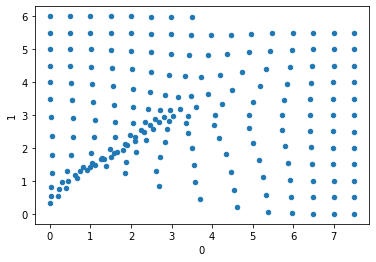

In [29]:
p_1 = [0.010934631864449852, 0.19253242345269231, 0.40394137832405091, 0.66319622543043166, 0.90598568400095603, 1.1101334070230213, 1.3757603207075308, 1.862973003253281, 2.6818904671810762, 3.6920058465630698, 4.6248743937339274, 5.3658386050205475, 5.9623043420863242, 6.4915503294012682, 6.99847108852871, 7.4997745176468831, 0.020094194699740889, 0.22032512594331111, 0.45182533830989929, 0.75411130276310834, 1.0511473087677015, 1.2752744729372483, 1.496461877436871, 1.8880652496995312, 2.6120545192793299, 3.5854797912957603, 4.5410093078094693, 5.3210589450440766, 5.9444798446831371, 6.4860323905737705, 6.9971216514819323, 7.4995130409183171, 0.032251973772040282, 0.30576568232297641, 0.61101316432998942, 0.98484905299090153, 1.3361874777451552, 1.5848459170771896, 1.7953590954170715, 2.123001127058274, 2.7125223628795725, 3.5528540362365004, 4.4591233217685717, 5.2580165340386458, 5.913649678451903, 6.475106789727227, 6.9941862025465031, 7.4989048648685399, 0.043537734179375884, 0.42287982752740783, 0.83030766562475411, 1.2709804929082786, 1.6450857187865258, 1.8974075489501325, 2.1054900673941943, 2.3823627871825561, 2.8275143958690423, 3.4998905588099607, 4.3310373787450063, 5.1534790420491623, 5.8599483298242356, 6.4553658412225081, 6.9887333986739666, 7.4977502504518796, 0.047887303875073534, 0.52037140091713974, 1.0130737202950943, 1.4926399227246137, 1.8633622333118967, 2.1081367244113074, 2.3152503485589366, 2.552135070729971, 2.880214750270143, 3.405291321893964, 4.1651224057821548, 5.0184045592750746, 5.7890871696348896, 6.4287964246582519, 6.9812702840741494, 7.4961467912129551, 0.042093530643037835, 0.56354138689082756, 1.099493084750877, 1.5997793708436636, 1.9823923186588568, 2.2453490597451862, 2.4636892666689567, 2.6794102332599499, 2.9351823631983667, 3.3531996927101564, 4.0474274192528235, 4.9135456421997477, 5.7309543355930632, 6.4061443182449116, 6.9747213918762991, 7.494707596592332, 0.029292756637799244, 0.55986495546301451, 1.1027140467671679, 1.6167260214646599, 2.0380555741707553, 2.350109755291717, 2.5939031304867912, 2.8072673621384685, 3.0372545703171081, 3.4110936335310513, 4.0624387499741319, 4.9061370331812899, 5.7210882293220102, 6.4008221452999265, 6.9728768430642489, 7.4942528350512818, 0.016084527374227095, 0.53746517237826918, 1.0687019904551174, 1.5872234522348985, 2.050786648507561, 2.427491299683866, 2.7196855881624247, 2.9587955068368577, 3.2119801718133156, 3.6043225977284172, 4.2321585675491518, 5.0126564194841388, 5.7691178371445266, 6.4169715393972986, 6.977048237260381, 7.4950926811266552, 0.0069709146629042479, 0.51752693852546638, 1.0343750205216358, 1.5489075417322404, 2.0390520405860846, 2.4752467817109367, 2.8393212448530427, 3.1483634881236204, 3.4695723063286352, 3.9022854917535454, 4.4957210860371175, 5.1820213593906796, 5.8488912211671931, 6.4452435090992397, 6.9847389060260605, 7.49671376831364, 0.0023913161947660337, 0.50638943427280503, 1.0134882340827627, 1.5215295171312757, 2.0216439623443674, 2.4965670679796412, 2.9293482714152863, 3.3251021115070745, 3.726127796369, 4.1909396259951164, 4.7410343526208356, 5.3370537027579692, 5.9222666374360609, 6.4716440309120777, 6.9920433616815822, 7.4982768078168522, 0.00065249254603678964, 0.5018538736524748, 1.0042464363105761, 1.5075842112440903, 2.0091184224896992, 2.5017425573614087, 2.9767493026054161, 3.4344626094594251, 3.8928482950645802, 4.377337274211313, 4.8966889793646597, 5.4346869818050205, 5.968651754702555, 6.4884905681126108, 6.996751870469903, 7.4992932534603414, 0.00014253992525376717, 0.50043385191864254, 1.0010850098659385, 1.5021515129205603, 2.0029694644235225, 2.5013481614160313, 2.9942110371575517, 3.4811612899487412, 3.9677485313057912, 4.4622963707220977, 4.9678701260011922, 5.4795148882546991, 5.9900977413731367, 6.4963426291237285, 6.9989628494235916, 7.4997734780731777, 2.5115724184002041e-05, 0.50008259009444511, 1.0002257690264305, 1.5004907005830601, 2.000751458815905, 2.5004865776341103, 2.9988902998398794, 3.4957644900299618]


q_1 = [0.31913994901914144, 0.54161271506147413, 0.80147979096512778, 1.0842320301503039, 1.3465563811785537, 1.4945799734477292, 1.466026296207618, 1.2403658907048831, 0.85748481521538888, 0.46474160080805105, 0.19603849147400906, 0.06522020577453666, 0.017403923455764633, 0.0037740396211264973, 0.0006707679556747859, 9.8147725517789246e-05, 0.54604711600632605, 0.75324931923783067, 1.0099458547514841, 1.2877559621453336, 1.5382515737048228, 1.6925664574572705, 1.7158991633041045, 1.5833526536256786, 1.3017496195113663, 0.97341087640798674, 0.72112479210093638, 0.58265348326504618, 0.52508390923519788, 0.50623127273415736, 0.50126783991652579, 0.50021030742666472, 0.81690572596784716, 0.95486370352437966, 1.1717264432345715, 1.4350678733376028, 1.681584087980762, 1.8539225579354059, 1.9314109860104784, 1.8918571849282535, 1.7257032420831964, 1.4844063038902944, 1.2600164224613826, 1.1117627693262953, 1.0385699611907537, 1.0107049713973246, 1.0023852084961478, 1.0004248723803575, 1.2340488320490575, 1.2884945918679407, 1.4367329427905389, 1.6558528832213146, 1.8853102558823218, 2.0788486304476632, 2.2138467348482016, 2.2566758273131251, 2.1826360901598352, 2.0108140641559693, 1.8077481582516617, 1.6464164515476316, 1.5547601666784447, 1.5161438803492602, 1.5037610127326766, 1.5006923743416876, 1.7867012912209685, 1.7815707961358704, 1.8417286938168873, 1.9660232500030772, 2.1336756097531726, 2.3243544510744623, 2.4965738545196823, 2.5890480193832612, 2.5739932096818738, 2.4634660148218268, 2.300805667074636, 2.1522874153433813, 2.05963333896816, 2.0181610184559626, 2.0043309462788295, 2.0008113142753374, 2.3784137336565228, 2.3453200558016825, 2.3281711555272895, 2.340101606623135, 2.4074123349763772, 2.5456059504418094, 2.7017318159729138, 2.79746959435256, 2.8148408556885935, 2.7695215917056202, 2.6842471513543065, 2.5973739823220301, 2.5393749873042784, 2.5122690035917414, 2.5029745986722922, 2.5005641820029871, 2.9437620500701844, 2.9069486660159152, 2.8527027471883954, 2.7902477905638436, 2.7590149391086749, 2.7970872102805799, 2.8759455222759218, 2.9363025935918521, 2.9656504327002242, 2.9800755682059772, 2.9901431565755567, 2.996538949208928, 2.9991592681825368, 2.9998523987787205, 2.9999803854804568, 2.9999979714558607, 3.4766023413437779, 3.4492507723530887, 3.3967154460250923, 3.3167615113184352, 3.2305174264439183, 3.1713567712129698, 3.1475613972752767, 3.1464487074327145, 3.170033419139374, 3.231282096219803, 3.3222785456737407, 3.4082543304608639, 3.4632939642561067, 3.4885564378436795, 3.4972064708295871, 3.4994653224653218, 3.9909093306089449, 3.975677673295321, 3.9420862374408983, 3.8820625910446545, 3.7967633967700563, 3.7002383562582608, 3.6137262665004601, 3.5617876224033642, 3.56983914276592, 3.6476711006037261, 3.7682170836369924, 3.880324898048551, 3.9518123900319995, 3.9848466590161671, 3.9962709889955552, 3.9992815987074284, 4.4968311819046036, 4.4902953653753661, 4.474391998953279, 4.4421992841411653, 4.3878314792531974, 4.3121935941086891, 4.2300220331609184, 4.1712159567038398, 4.1672154706519988, 4.2261520365938727, 4.3204281317730384, 4.407347266422307, 4.462563806608407, 4.4881630814868752, 4.4970711059437463, 4.4994331097758034, 4.999067586657409, 4.9968794180228109, 4.9910716050503865, 4.9779825891114662, 4.952994539114564, 4.9138375243667465, 4.8668325491727922, 4.8299042989410266, 4.8235325418983486, 4.8533981387710767, 4.9035311193504389, 4.9500643301966889, 4.9797348298867767, 4.9935614336288356, 4.9983998339405353, 4.9996891537346935, 5.4997770871478222, 5.4991991810086818, 5.4975278492354356, 5.4933815457308066, 5.4847007470590903, 5.4700104627959654, 5.451272477658323, 5.4356447553686316, 5.4318798453619772, 5.4427646210265506, 5.4620739467395989, 5.4802613307713397, 5.4919505029021005, 5.4974315216917873, 5.4993593567784149, 5.4998751878139487, 5.9999572917194737, 5.999835636569105, 5.9994521476425673, 5.9984163174195562, 5.9960881771975458, 5.9919335762507142, 5.9864169729277448, 5.9816243442189894]


plot_data(p_1, q_1)

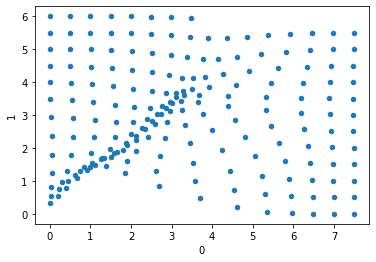

In [30]:
p_1 = [0.010934762849004005, 0.19253345354275311, 0.4039475895466817, 0.66322461856753767, 0.90608631358863145, 1.1104131495457019, 1.3763370674183186, 1.8637272958376974, 2.6821975151127782, 3.6912489682415264, 4.62330602098681, 5.3642691308384931, 5.9612524657484709, 6.4910335018638943, 6.9982789386976911, 7.499719843516254, 0.020094857855801115, 0.22033030538540449, 0.45185629969113583, 0.75424988510517155, 1.0516229216321606, 1.2765709829145058, 1.4991731800200863, 1.8918113284065141, 2.6139561611121755, 3.5822277448084026, 4.5334555459790922, 5.3132393589673468, 5.9391701184518491, 6.4834118717117812, 6.9961461634489961, 7.4992353989068841, 0.032254585904186971, 0.30578553775114686, 0.61112796906575395, 0.98534084578700998, 1.3377934346279023, 1.5890533239621685, 1.8039507352367312, 2.1346867412227231, 2.7180957217039126, 3.5407086806897223, 4.4308351463033882, 5.2279294828372977, 5.892869188180744, 6.4647749195728919, 6.990330905908718, 7.4978069178357369, 0.043545749515727726, 0.42293832806481768, 0.83062882861547238, 1.2722802307544709, 1.6491140261942674, 1.9075048915375694, 2.1251410791613843, 2.4077121620646502, 2.8378146297113616, 3.4660641436280333, 4.2515525062362709, 5.0650948799475621, 5.7971196498573043, 6.4237222247343588, 6.9768744607911994, 7.4943692034485023, 0.04790650337934696, 0.52050642756735155, 1.0137792523732767, 1.4953581173683153, 1.8714688667988175, 2.1277295931816549, 2.3513363896993842, 2.5962299874738557, 2.8973742745904927, 3.3395019080680628, 3.9982158266892185, 4.8196808477717559, 5.6421033571774082, 6.3534710241990586, 6.9528753987806589, 7.4880389725773027, 0.042129470436034197, 0.56378925802091318, 1.1007538624429691, 1.6044966770368043, 1.9959514817339983, 2.2763218204413564, 2.5164921891340595, 2.7383794253767562, 2.9525295536322003, 3.2460864713952611, 3.7671036709032109, 4.5615685914455018, 5.4620759390291695, 6.2663476424069442, 6.9217600232477965, 7.4795650458112188, 0.029345275029740991, 0.56022615002329568, 1.1045453585251803, 1.6235065919174545, 2.05670489071559, 2.3889189157782647, 2.6520774810395116, 2.8588485356704667, 3.0227476260491319, 3.2296992043993518, 3.6487246847515027, 4.3959962175145062, 5.3312858141317321, 6.1977370036197446, 6.8958542668628446, 7.4722227828319783, 0.016144303104630185, 0.5378782165805569, 1.0708143390763392, 1.5950707171241147, 2.0716394105170486, 2.4662316132402204, 2.7651879708820113, 2.9712914010475404, 3.1184442492960147, 3.3021612988642088, 3.6884705078715525, 4.4022875065418479, 5.3196173680270329, 6.1857531338494098, 6.8896785850515814, 7.4701246966097976, 0.0070238276771193023, 0.51789440005914522, 1.0362722949575891, 1.5560205466752104, 2.0576820385329766, 2.5065831989448251, 2.8623388619046062, 3.1086568618270656, 3.2867206663899418, 3.5041534158937844, 3.9132867095060577, 4.5980454244474771, 5.4407807208685499, 6.2395056797525541, 6.9074863587773594, 7.4746716530239512, 0.0024277383861693595, 0.50664311971018317, 1.0148060665512746, 1.5265104450079165, 2.0346801149829155, 2.5172292137456993, 2.9363043465311303, 3.2653029199546353, 3.5317936955830911, 3.829768927478749, 4.2750800852786037, 4.9071766976788433, 5.6345524279506298, 6.3291590831620352, 6.9388511856233803, 7.4831222324577098, 0.00067199924893550941, 0.50198990866324411, 1.0049551028442629, 1.5102754571277577, 2.0161855057885618, 2.512688509453699, 2.977974605343372, 3.3916872293383045, 3.7649456353623578, 4.1537593019826495, 4.6249837339947435, 5.1949778357124856, 5.8122049582326216, 6.4118537788440877, 6.9682465686915966, 7.4911797608673139, 0.00015067291136627967, 0.50049059198242229, 1.0013808939902689, 1.5032774749808691, 2.0059337445613115, 2.5059147249193852, 2.9943382117956303, 3.4614132280370833, 3.9099579914909866, 4.3633462239683247, 4.8503558408453289, 5.3777494001595372, 5.9244098783780306, 6.4643237546105698, 6.9870734982720268, 7.49639091016995, 2.7756221546050074e-05, 0.50010101348480829, 1.0003218698289749, 1.5008566522613924, 2.0017159605556292, 2.5019716853250418, 2.9988982143512057, 3.4891586519546034]



q_1 = [0.31914011031899719, 0.54161398398097949, 0.80148744361246849, 1.0842674579430172, 1.346683894603482, 1.494950831645449, 1.4669260778208351, 1.2421966049713868, 0.86051805593370179, 0.46860827398240795, 0.19971017808810157, 0.067830500190226045, 0.018818092323097901, 0.0043655704389697781, 0.00086295902548939039, 0.00014674819550079002, 0.54604788465806753, 0.75325536899469236, 1.009982185152104, 1.287923320898007, 1.5388523575536357, 1.6943010004687955, 1.7200180402423895, 1.591494274493354, 1.314975977476659, 0.99022206045631944, 0.73719727282281189, 0.59416643311868089, 0.53135016137204794, 0.50885760715204276, 0.50212169717937538, 0.50042626160681725, 0.81690852764198041, 0.95488614495963542, 1.1718623582565826, 1.4356938389230949, 1.6838218857741889, 1.8603030794025748, 1.9461644047890447, 1.9199472364671462, 1.7697952696644352, 1.5396700405150114, 1.3131367688068762, 1.1502472268716499, 1.0596912265801097, 1.0195924703886712, 1.0052785874326857, 1.0011569115565486, 1.2340563308861643, 1.2885561429454806, 1.4371123636425465, 1.6576150245460499, 1.8915974583123349, 2.0964421878153221, 2.253085783574305, 2.3282262084711309, 2.2911626732463461, 2.1454175851748385, 1.9386617305757552, 1.7430134027156035, 1.6084783368034252, 1.5388905862188078, 1.5111826025286723, 1.5025711528615489, 1.7867156857385198, 1.7816915993336722, 1.8424950683197998, 1.9696910827861032, 2.1469864535794483, 2.3611658147042118, 2.5758038294795114, 2.72796447845122, 2.7782721025725472, 2.7128857895558527, 2.5442193306650198, 2.3342055055136841, 2.1618899096873849, 2.0616989823481533, 2.0185642913724444, 2.0044164143832748, 2.3784334366036384, 2.345488393316423, 2.3292802304247258, 2.3456937603223551, 2.4286328468273242, 2.6052979172201045, 2.829553897463454, 3.0186627011631839, 3.1320258439918272, 3.1426830320780907, 3.0363830260263187, 2.8553726200999785, 2.683182046351809, 2.573329201988193, 2.5229217864897815, 2.5056157415380844, 2.9437807230372908, 2.9071104620594688, 2.8538101495519821, 2.7961777872339115, 2.783074045442206, 2.8689209328016751, 3.0369690221759837, 3.2209806902248372, 3.3684265591915414, 3.4301156441702663, 3.3833818068000436, 3.2650959469637262, 3.14253210346192, 3.059577697138069, 3.0193678696650466, 3.0048998089173451, 3.4766128263852023, 3.4493431502446996, 3.3973752858268709, 3.320556558321214, 3.2474217788232695, 3.2274291042479666, 3.2859345450983195, 3.4053012217224179, 3.5362548875684889, 3.6156410481099015, 3.6213220878027661, 3.5877102761246968, 3.5504154336312936, 3.5231646175156635, 3.5082520737883067, 3.5022455414653235, 3.9909094913206205, 3.9756812735436426, 3.9421421373721368, 3.882640699881263, 3.8007035659163817, 3.7181390677005544, 3.6690609052748164, 3.6790667140169035, 3.7373439489962039, 3.8031356818078517, 3.8584734420200344, 3.9123536310628952, 3.9587153807345294, 3.9857515632625957, 3.9963432837194017, 3.9992851201866531, 4.4968251451992458, 4.4902454855762031, 4.4740772919428551, 4.4407095264713767, 4.3826637998328364, 4.2993803887372879, 4.2073750212191232, 4.1397225414679184, 4.1224634748061666, 4.1575679646185542, 4.2346717219977847, 4.3324199240552304, 4.4170216995843621, 4.4681276485508308, 4.4904478578010538, 4.497750532864174, 4.9990610890726712, 4.9968251335672553, 4.9907196882146785, 4.9762190111346891, 4.9461976706045991, 4.8937619150414058, 4.821150809918894, 4.7481953760592068, 4.7055595300861777, 4.7148692330755502, 4.7740981194472605, 4.8565249507912984, 4.9281031842136187, 4.9717344122487717, 4.9912791295575181, 4.9978864327100263, 5.4997730210658888, 5.4991651492399232, 5.4973061816214956, 5.4922589415578464, 5.4802865703834254, 5.456548372396349, 5.4193902463981471, 5.3767223064842105, 5.3463730152955407, 5.3451361417113548, 5.3747640310973246, 5.4195077061216521, 5.4591746377943915, 5.4837183141858299, 5.4949015984629828, 5.4987477022429818, 5.9999555314107518, 5.9998208985811825, 5.9993560623180038, 5.9979286086700005, 5.9941614988585723, 5.9860113412486937, 5.9722496147564206, 5.9552200942023976]





plot_data(p_1, q_1)



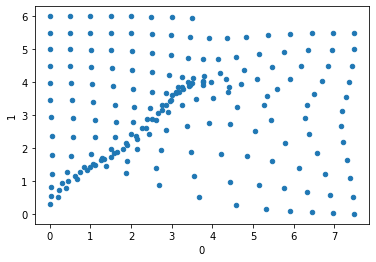

In [31]:
p_1 = [0.010934780575834965, 0.19253368338682902, 0.40394987452232517, 0.66324183966647188, 0.90618693834046893, 1.1108742987226674, 1.3779042708303395, 1.8671055580752851, 2.6844641196034242, 3.6820383877223644, 4.5918348184706961, 5.3123297629037323, 5.9038423564739055, 6.4445170560660703, 6.9697627456901863, 7.4863416873998645, 0.020094912290953292, 0.2203310063453611, 0.4518632080251494, 0.75430086355391168, 1.0519113250152679, 1.2778665182798064, 1.5036353012630979, 1.9019599201712603, 2.6224369523746454, 3.558331662992706, 4.4418829721984192, 5.1567079070473838, 5.763653212708074, 6.3404439423638141, 6.9083569590825498, 7.45803221348599, 0.032254715954474274, 0.3057871675719297, 0.61114350545053586, 0.98545055281209126, 1.3383836628937489, 1.5915976580965094, 1.8124810984763662, 2.1536963468298986, 2.7329519678704526, 3.487472754633691, 4.225864579837352, 4.8662780809855271, 5.4784587386293309, 6.1236476027636044, 6.7800420142947075, 7.3989969958358115, 0.043545991557256594, 0.42294124056895804, 0.83065518737685973, 1.2724559989162489, 1.6500101907315645, 1.9111854786063593, 2.136798179429888, 2.4320211352455878, 2.8537827261899356, 3.3803364352740695, 3.9165986150589966, 4.4388231999956744, 5.0485245200967253, 5.7939637153535974, 6.5853279547156136, 7.3099090585083202, 0.047906855028247056, 0.52051050479684513, 1.0138143662741634, 1.4955808380183033, 1.8725581555957924, 2.1320053122648566, 2.3639120985187199, 2.6203417130203999, 2.9120756558960328, 3.2486407699193456, 3.6095101929393021, 4.0167494918462134, 4.6132672754147315, 5.4559791787441441, 6.3866165172100109, 7.2200290644814897, 0.042129869686219061, 0.56379379747715785, 1.1007919093736309, 1.6047307466427883, 1.9970496553419641, 2.2803414896371157, 2.5271141144302676, 2.7560826726603374, 2.9602352524021547, 3.1714569764744001, 3.4286203641365325, 3.7807842957227509, 4.375688743968519, 5.2757776472069997, 6.2851554892804282, 7.1764434436853737, 0.029345628889626461, 0.56023016193847441, 1.1045788677947292, 1.6237103437271649, 2.0576153846882907, 2.3919143298525776, 2.6588226910692665, 2.8672776048505018, 3.0194889740590027, 3.1682246422611153, 3.3961110385103925, 3.7800150485263249, 4.4234822053272067, 5.3419243653269746, 6.3377637992006228, 7.2051573619801426, 0.016144547389484138, 0.53788099918369225, 1.0708377794839461, 1.5952136464589957, 2.0722552758485797, 2.468029864790108, 2.7683167351918674, 2.9724696737002936, 3.106782721522424, 3.2465818339793078, 3.5042146541032917, 3.9770223233170423, 4.6988165150132275, 5.5997665925540634, 6.506717021957388, 7.2866596068248617, 0.0070239588330497475, 0.51789590156815601, 1.0362850663529746, 1.5560991776881892, 2.0580166435741667, 2.5074729683675132, 2.863320677241592, 3.1062698371641537, 3.2716105984382615, 3.4545165690520037, 3.7824561979149856, 4.33864072944868, 5.0911330285621936, 5.9205574346357661, 6.7015633426767609, 7.3763699773212235, 0.0024277931440540705, 0.50664374846954041, 1.0148114486585602, 1.5265438931690678, 2.0348230039153048, 2.5175921220063389, 2.9364937206312245, 3.2628733237156275, 3.5201110034310008, 3.7957131368436254, 4.1989367855973008, 4.7781225483975263, 5.4772262196884114, 6.192522073781987, 6.8523206640757737, 7.4420666085058338, 0.00067201703663040456, 0.50199011317247388, 1.0049568588292266, 1.5102864358011643, 2.0162327838067422, 2.5128074366640241, 2.9779958648504805, 3.3905227006376046, 3.7594899536271194, 4.1383859800120186, 4.5934800054822036, 5.1467575379762103, 5.7576844484746665, 6.3663923671191736, 6.9399445700593967, 7.4778269953447616, 0.00015067740958158587, 0.50049064372148866, 1.0013813387682111, 1.5032802638637419, 2.0059458228794784, 2.5059452124028851, 2.9943395935415764, 3.4610663746714887, 3.9083170810172696, 4.3587531466690734, 4.8412857156667464, 5.3645421952319472, 5.9100749255625464, 6.4526525396874508, 6.9798836821223, 7.4930108850093013, 2.775710733345447e-05, 0.50010102367442244, 1.0003219574573523, 1.5008572023132167, 2.0017183490087889, 2.5019777365760603, 2.9988982672984252, 3.4890862455340668]


q_1 = [0.31914013807911795, 0.54161434898394456, 0.80149113903051605, 1.0842963153240228, 1.3468594577266781, 1.4958062305591437, 1.4703362964041695, 1.2533689628562512, 0.89004132528982216, 0.52898702357030736, 0.29277389569175749, 0.17618270215649434, 0.11538878359103676, 0.070930144524080072, 0.036517389073290794, 0.015011855288347465, 0.54604796602024175, 0.75325643991255642, 1.0099930025859016, 1.2880075849082591, 1.5393646848133831, 1.6967859591868364, 1.7297697830714025, 1.6227087545026353, 1.3959303054157939, 1.1547933687811107, 0.99175686424393139, 0.89229879995231043, 0.79820221855801488, 0.69318531572037179, 0.60093318739797252, 0.54163254547963779, 0.81690871095024031, 0.95488859198481557, 1.1718872551194661, 1.4358879310227897, 1.6849994181569705, 1.8659648369886193, 1.9679447174139033, 1.987611273381114, 1.9400258065411526, 1.8803597250557365, 1.8412887693590214, 1.7751630951295341, 1.624149908927655, 1.4114868277142483, 1.2157988570453209, 1.0890053632302295, 1.2340566391996661, 1.2885603374883268, 1.43715565420817, 1.6579550593558305, 1.8936595421443678, 2.1062241971389626, 2.2896871757383783, 2.4378824824716392, 2.5578635211797027, 2.6704886769466918, 2.7579698782116928, 2.7307445174786587, 2.5161537019512754, 2.1755260847063296, 1.8546770416374803, 1.6461143739138206, 1.786716068500074, 1.7816968914554492, 1.8425508890614533, 1.970139636278796, 2.1497402594801489, 2.3741009247288987, 2.6228019725498242, 2.8636424516242176, 3.0965399525380821, 3.3249877992900609, 3.5005012848298707, 3.5104831976693047, 3.2670510900765448, 2.8480785824117185, 2.4456621073984719, 2.1833021340439092, 2.3784337904598756, 2.3454933395384727, 2.3293337320156362, 2.3461389705955651, 2.4314452682319003, 2.6185992857939664, 2.8772352706336197, 3.1527351234258569, 3.4352470533466692, 3.7059428750026626, 3.9028259747234735, 3.9276863100499892, 3.7054743803252634, 3.3092543219999349, 2.9250165634176342, 2.6744048415980304, 2.9437809679710125, 2.9071139035650431, 2.8538480915067135, 2.7965040022099474, 2.7852138823815493, 2.879367114816112, 3.0750265077331123, 3.3272174686099665, 3.6021533678021957, 3.8502649156257851, 4.0128935641958465, 4.0306196735067124, 3.8658308296388459, 3.5788943040180623, 3.3030981727432374, 3.1240401778225957, 3.4766129511031685, 3.4493449027423386, 3.3973947583832462, 3.3207274151301758, 3.2485844220671201, 3.233400848621816, 3.3087736936725993, 3.4707516452326419, 3.680369138648909, 3.870279646910908, 3.9902986421779012, 4.0160087850884274, 3.9383687865080912, 3.7948133051209387, 3.6551233653546702, 3.5637171277992019, 3.9909095355402191, 3.9756818931884306, 3.9421490173081843, 3.8827015449946942, 3.80112942072244, 3.7204506238925195, 3.6785533185577122, 3.7080855930704981, 3.803885433328277, 3.9209739607515224, 4.0219998593223156, 4.0889071697072854, 4.1078818998926767, 4.0856102426381939, 4.0492356035305423, 4.0212692918118105, 4.4968251543909474, 4.4902456141229523, 4.4740787177846286, 4.4407222223454843, 4.3827551793972024, 4.2999070582287588, 4.2097315814221234, 4.1476008071052144, 4.1417416068359447, 4.1921434808510609, 4.2803744359679152, 4.377593493385783, 4.4518351140112253, 4.4899570191692284, 4.5016419371257843, 4.5023500428002334, 4.9990610890782392, 4.9968251338271781, 4.9907196963829596, 4.976219186391055, 4.9462002561199805, 4.8937878421933805, 4.8213234399982703, 4.7489440185718648, 4.7076595139537405, 4.7186684718562297, 4.7784777026803251, 4.8596768776481474, 4.9294970552524884, 4.9721110384483973, 4.9913413278254586, 4.9978927165752784, 5.4997730203164892, 5.4991651389073599, 5.4973060709496728, 5.4922580243186738, 5.4802807347019735, 5.4565202011237526, 5.4192878952059234, 5.3764391169439918, 5.3457484072214028, 5.3439733871961952, 5.3729270024569686, 5.4171775512941167, 5.4569238429193243, 5.482088680004094, 5.4940091515324969, 5.4983727838215017, 5.9999555311155, 5.9998208945059019, 5.9993560185249812, 5.997928242519257, 5.9941591202688329, 5.985999360801082, 5.9722028924980757, 5.9550787002649308]


plot_data(p_1, q_1)

Notice how as we complete the spiking, we get higher and higher "wrapping" around the diagonal.

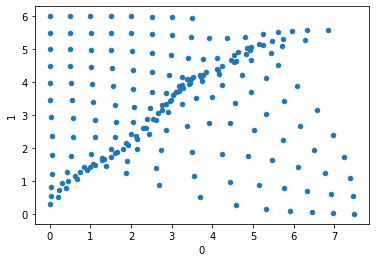

In [32]:
p_1 = [0.010934780575846445, 0.19253368338714413, 0.40394987452895692, 0.66324183977228124, 0.90618693964926211, 1.1108743114179793, 1.3779043621017526, 1.8671059737464453, 2.6844647075498189, 3.6820333613725298, 4.5917986838762204, 5.3122038464087433, 5.9035469364398381, 6.4440071905050509, 6.9690968921687766, 7.4856776084929697, 0.02009491229102792, 0.2203310063473955, 0.45186320806759556, 0.7543008642169885, 1.0519113329556975, 1.2778665937458329, 1.5036358502954059, 1.901962547296602, 2.6224415399226002, 3.5583048319034418, 4.4416695412707803, 5.1559420876874844, 5.7618198322076912, 6.3372196554511273, 6.9040822110152087, 7.4537292001230098, 0.032254715954851722, 0.30578716758194363, 0.61114350565262088, 0.98545055583286867, 1.3383836972886896, 1.5915979715260637, 1.8124833112119068, 2.1537066297710337, 2.7329684460431158, 3.4873537880672489, 4.2249430734100466, 4.862912656121309, 5.4701088768191788, 6.108336020988121, 6.759045777469102, 7.3774338713104157, 0.043545991558743752, 0.4229412406068418, 0.83065518810267758, 1.2724560091615524, 1.6500103012536866, 1.9111864369516731, 2.1368045408816863, 2.4320484299391016, 2.8538184101678694, 3.379969324251753, 3.9138734677621057, 4.4285613446564582, 5.0212288554307412, 5.7397968504668926, 6.5065637965333698, 7.2263524037231086, 0.047906855032821057, 0.52051050490911732, 1.0138143683210803, 1.4955808655001466, 1.8725584399071218, 2.1320076655062472, 2.3639265376917447, 2.6203979109379412, 2.9121417503485043, 3.2479015338885349, 3.6039284086428625, 3.9944130643787732, 4.5470547543735318, 5.3093167370848073, 6.1574521644248073, 6.9680237658100639, 0.042129869697212989, 0.5637937977417834, 1.1007919140689011, 1.6047308077852187, 1.9970502620603003, 2.2803461700433423, 2.527139865140307, 2.7561692845797729, 2.9603069594385545, 3.17023412526552, 3.4192042318921789, 3.7396372660631214, 4.2402441564013218, 4.9497670409509986, 5.7518885716550692, 6.5781579034697986, 0.029345628910254603, 0.56023016243358326, 1.104578876549158, 1.6237104564024254, 2.05761644973812, 2.3919217183462083, 2.6588574004645622, 2.8673656515888233, 3.0194233162218649, 3.1659831248281205, 3.3798536514848743, 3.703218013581425, 4.1616472862205738, 4.7151534746928014, 5.3255357596535733, 6.0797280936198224, 0.016144547419631283, 0.53788099991067029, 1.0708377924483117, 1.5952138137950156, 2.0722568014133942, 2.4680392693573618, 2.768351029496662, 2.9724962467164322, 3.1062592910396281, 3.2418013263401875, 3.4741047277117252, 3.8370615321821324, 4.2441610377044112, 4.5874164635120724, 4.9593835668983521, 5.6174326775469803, 0.0070239588673153552, 0.51789590239861671, 1.036285081306644, 1.5560993725843701, 2.0580183987967984, 2.5074828349885112, 2.8633436026439885, 3.10615360500169, 3.2701019378393612, 3.4445315368894152, 3.7295092323324517, 4.1213442215877327, 4.4569648808818414, 4.6318659896925283, 4.85078167133838, 5.4453035025461256, 0.0024277931743398001, 0.50664374920574173, 1.0148114619994342, 1.5265440686849245, 2.0348245910329963, 2.517600650374817, 2.9365031209808907, 3.2626195912680922, 3.5175615090020145, 3.7802865635724223, 4.1273404960632778, 4.5234022286369475, 4.8142443971308531, 4.949352728264909, 5.1524901371710223, 5.7123241319259925, 0.00067201705745765388, 0.5019901136794015, 1.0049568680437819, 1.5102865577623104, 2.0162338956257262, 2.5128133562561601, 2.9779981034232259, 3.3902636316990655, 3.7569312521001805, 4.1232175006181775, 4.5280796034535955, 4.9353967264461467, 5.2504367415586479, 5.4654423734293562, 5.7450959804047299, 6.2794229582501941, 0.00015067742073154685, 0.50049064399299037, 1.0013813437092467, 1.5032803294518584, 2.0059464242162242, 2.505948425561725, 2.9943399017755286, 3.4609026559060645, 3.9066791295671646, 4.3490623603147354, 4.8008354915312577, 5.2399317383213191, 5.6235610612814257, 5.9580517824314647, 6.3338441535221808, 6.8493762995591947, 2.7757111981640173e-05, 0.50010102378761878, 1.000321959518174, 1.5008572296986744, 2.0017186007492973, 2.5019790867762635, 2.998898292307719, 3.4890138498312999]


q_1 = [0.31914013807913977, 0.54161434898455718, 0.80149113904379587, 1.0842963155466079, 1.3468594606352466, 1.4958062608282492, 1.4703365512774176, 1.2533707044462501, 0.89005084681167435, 0.52902734274539187, 0.29290344952389458, 0.17649983454537874, 0.115987449714269, 0.071807779466506377, 0.037517651847346997, 0.015897767388194785, 0.54604796602037831, 0.75325643991639646, 1.0099930026690238, 1.2880075862995464, 1.5393647029949789, 1.6967861477590163, 1.7297713498648146, 1.62271922742887, 1.395986246776171, 1.1550262091880634, 0.99249819623752344, 0.89411247924137749, 0.80165304030930329, 0.6983075968991026, 0.60683839274749396, 0.54690110949445259, 0.81690871095089956, 0.95488859200356746, 1.1718872555278999, 1.4358879378665863, 1.6849995074761388, 1.8659657569876564, 1.9679522304497077, 1.9876600255718102, 1.9402763268510586, 1.8813651134673504, 1.8444149540872323, 1.7827816656479263, 1.6388920319224494, 1.4339789278484554, 1.24237269401299, 1.1130782118810605, 1.2340566392020635, 1.2885603375575867, 1.4371556557348033, 1.657955085106589, 1.8936598783257657, 2.1062276243358999, 2.2897145192583124, 2.4380536629713623, 2.5587035664011379, 2.6737024113992942, 2.7676087861018841, 2.7540612299341398, 2.5625743815020767, 2.2496715579256277, 1.9457434314720607, 1.7305236069845269, 1.7867160685066021, 1.7816968916464555, 1.842550893346024, 1.9701397098939117, 2.1497412304148993, 2.374110754991575, 2.6228786348264443, 2.8641067026861031, 3.0987225403533816, 3.3329409012783788, 3.5233912427648262, 3.5651740649184855, 3.3792181438316713, 3.0363002477347263, 2.6861757701053985, 2.4112219115981044, 2.3784337904733364, 2.3454933399354325, 2.3293337410903501, 2.3461391307122903, 2.4314474269704669, 2.618621277236755, 2.8774053188662307, 3.1537461507226539, 3.4398720250618631, 3.7223043587184468, 3.9488976726961278, 4.0368964380348231, 3.9313838221098103, 3.6947100939388564, 3.4241670433038953, 3.1508043242466242, 2.9437809679922347, 2.9071139041926903, 2.8538481060379235, 2.7965042644765017, 2.7852175156193488, 2.8794050318026945, 3.0753240775260475, 3.3289905663894861, 3.6102316495620381, 3.8789091653812187, 4.0944493787201086, 4.2245166631086999, 4.2583893105177371, 4.2268565507314406, 4.120974994976363, 3.8937353592135451, 3.4766129511286632, 3.4493449034954584, 3.3973947758732868, 3.3207277342810628, 3.2485889464397051, 3.23344975863774, 3.3091720553552886, 3.4731929442066458, 3.6917395690364754, 3.9115687567079704, 4.1103109414250758, 4.3002202850887485, 4.4901246207146004, 4.6535138675161667, 4.6897965488634172, 4.5124066321259182, 3.9909095355632207, 3.9756818938657257, 3.9421490329786986, 3.882701830785364, 3.8011335179364498, 3.7204962893043572, 3.6789426978598581, 3.7105923642748948, 3.8160837478876468, 3.9666469752954203, 4.1558464639626527, 4.3991276710599765, 4.6816957196488316, 4.9303317582439288, 5.0246178017652712, 4.8943811523243603, 4.4968251544061344, 4.4902456145687299, 4.4740787280391325, 4.4407224080842882, 4.3827578387621449, 4.2999371137475757, 4.2099965811874771, 4.1493887929471489, 4.1508504689629451, 4.2271925830527683, 4.3830644286777574, 4.6100071166868615, 4.8661715882398706, 5.0779683471404704, 5.1627901118503594, 5.0855355225172509, 4.9990610890851901, 4.9968251340307548, 4.9907197010445472, 4.9762192702068191, 4.9462014470872555, 4.8938012831308724, 4.8214433516968978, 4.7497739568690038, 4.7120133748036164, 4.735741636163052, 4.8286120307275988, 4.9719483457963376, 5.1264050677955373, 5.2472056954079038, 5.2972325327549052, 5.2660874046028789, 5.4997730203183481, 5.4991651389617617, 5.4973060721924458, 5.4922580465685575, 5.4802810490976057, 5.4565237357255088, 5.4193195175264099, 5.3766605354285071, 5.3469282070595003, 5.3486522457239758, 5.3867028347920085, 5.4478920683695407, 5.5103928608464301, 5.5562807187676038, 5.5761447402403572, 5.5702320856568832, 5.9999555311155, 5.9998208945059099, 5.9993560185256447, 5.9979282425571023, 5.9941591217417498, 5.9859993987585538, 5.9722035234914399, 5.9550853496219576]


plot_data(p_1, q_1)

# Candidate Algorithm

After applying the solution to the spike diagonal problem discussed above, the training algorithm is ran using the most optimum hyperparameters that I was able to come up manually with. Notice how the neurons seems to wrap around the red path, which is the actual path followed by the data.

One remaining problem is the confusion that unmoved neurons can cause. For this, I suggest, as a final step, to clean the output delay vectors by removing any delay vectors that have almost no change, as specified with some threshold w.

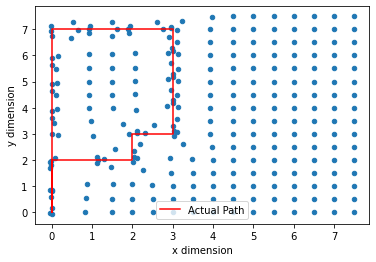

In [106]:
p_1 = [ -0.0664915, 0.170821, 0.825322, 0.848753, 1.70254, 1.79192, 2.99835, 3.5911, 3.88422, 4.65731, 4.91584, 5.61595, 5.89675, 6.75157, 6.94708, 7.11881, -0.0262995, 0.564358, 0.844069, 1.91425, 1.95409, 2.08128, 2.93795, 3.4287, 3.93668, 4.48211, 4.95953, 5.49024, 5.97295, 6.6629, 6.98623, 7.2617, 0.0151935, 0.533724, 1.07085, 1.87218, 2.01192, 2.12903, 2.92878, 3.48168, 3.99577, 4.49923, 4.99967, 5.50198, 6.06619, 6.86203, 6.99611, 7.12984, 0.000315519, 0.502614, 1.06456, 1.72376, 2.0206, 2.40531, 2.98413, 3.36921, 3.98022, 4.4997, 5.00009, 5.50199, 6.06133, 6.7287, 6.99997, 7.27217, 1.29286e-05, 0.502008, 1.06715, 1.90249, 2.10724, 2.34776, 3.03973, 3.1188, 3.92347, 4.50873, 5.00553, 5.51485, 6.07791, 6.87504, 7.0007, 7.12933, 3.88858e-06, 0.500691, 1.02294, 1.62455, 2.06133, 2.6213, 3.01704, 3.35201, 4.067, 4.68894, 5.09588, 5.7062, 6.11044, 6.72039, 6.99617, 7.29197, 2.88488e-07, 0.500051, 1.00171, 1.51112, 2.07171, 2.90235, 3.10131, 3.31544, 4.16157, 4.29346, 5.17294, 5.28355, 6.1855, 6.29482, 7.03842, 7.0956, 4.49456e-09, 0.500001, 1.00003, 1.50086, 2.02395, 2.62794, 3.05051, 3.57364, 4.03955, 4.49973, 5.03494, 5.49135, 6.03681, 6.49982, 6.98974, 7.3143, 1.47473e-11, 0.5, 1, 1.50006, 2.00182, 2.50957, 3.00372, 3.5071, 4.00168, 4.49964, 5.00004, 5.49888, 5.99984, 6.49871, 6.9965, 7.48271, 1.12469e-14, 0.5, 1, 1.5, 2.00003, 2.50015, 3.00005, 3.50011, 4.00002, 4.49994, 4.99998, 5.49992, 5.99997, 6.49992, 6.99992, 7.49965, 5.50457e-18, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 2.9167e-21, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 4.26125e-25, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 1.32297e-29, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8.61458e-35, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 1.17583e-40, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, ]

q_1 = [ -4.77359e-07, -1.18918e-06, -0.00309682, -0.00296804, -0.0351306, -0.0284281, -0.00350313, -1.49456e-05, -3.84725e-07, -3.38986e-09, -7.63515e-08, -8.79138e-06, -0.000904365, -0.00760695, -0.0233843, -0.00931885, -0.0516427, -0.0231844, -0.0462508, -0.0444616, -0.0122918, 0.0664891, 0.148543, 0.0608227, 0.115289, 0.109626, 0.117732, 0.105179, 0.144765, 0.464932, 0.649173, 0.534679, 0.831508, 0.855744, 0.867387, 1.11983, 1.14831, 1.11168, 1.02438, 0.976113, 0.929917, 0.932983, 0.925823, 0.931295, 0.931516, 0.929199, 0.912747, 0.935312, 1.49585, 1.49685, 1.50512, 1.4713, 1.29446, 1.56718, 1.90307, 1.76236, 1.52205, 1.50049, 1.50003, 1.49995, 1.49381, 1.49947, 1.6124, 1.49859, 1.99998, 1.99991, 1.99673, 2.01728, 2.04688, 2.03798, 2.10857, 2.10583, 2.07655, 2.06856, 2.07378, 2.06806, 2.06345, 1.90799, 1.89513, 1.92721, 2.5, 2.49965, 2.48023, 2.25141, 2.11052, 2.18417, 2.31684, 2.52173, 2.86242, 2.94899, 2.881, 2.95311, 2.8733, 2.90196, 2.76941, 2.60995, 3, 2.99993, 2.99624, 2.96015, 2.92055, 3.02923, 3.03221, 3.00988, 3.00143, 3.00003, 3, 2.99999, 2.9934, 2.98891, 2.94757, 2.94879, 3.5, 3.5, 3.49987, 3.49833, 3.47759, 3.25102, 3.10675, 3.09313, 3.12207, 3.1164, 3.12027, 3.11751, 3.11795, 3.1055, 3.10179, 3.22, 4, 4, 4, 3.99992, 3.99635, 3.96134, 3.91433, 3.92719, 3.92552, 3.93269, 3.92636, 3.93259, 3.92627, 3.93251, 3.92935, 3.9639, 4.5, 4.5, 4.5, 4.5, 4.49988, 4.49873, 4.49716, 4.49789, 4.4978, 4.49816, 4.49784, 4.49817, 4.49784, 4.49816, 4.49791, 4.49896, 5, 5, 5, 5, 5, 4.99999, 4.99998, 4.99999, 4.99999, 4.99999, 4.99999, 4.99999, 4.99999, 4.99999, 4.99999, 4.99999, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, ]

ax = plot_data(q_1, p_1)

soln_x = [0, 0, 0, 1, 2, 2, 3, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
soln_y = [0, 1, 2, 2, 2, 3, 3, 4, 5, 6, 7, 7, 7, 7, 6, 5, 4, 3, 2, 1, 0]
pd.DataFrame([soln_x, soln_y]).transpose().plot.line(x=0, y=1, style='r', ax=ax)
ax.set(xlabel="x dimension", ylabel="y dimension")
ax.legend(["Actual Path"])
plt.show()

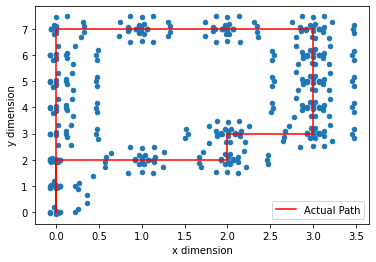

In [7]:
p_1 = [ -2.2293e-13, -2.11462e-11, -1.951e-07, -4.02998e-05, -7.90918e-06, -7.07353e-05, -0.00232499, -0.0046245, -0.00456042, -0.00419873, -0.000192112, -1.46785e-06, -2.62033e-09, -8.44587e-11, -1.77519e-13, -3.41985e-16, -8.36659e-15, -5.80836e-11, -6.24034e-08, -1.33485e-06, -0.000109547, -0.00141091, -0.00319894, -0.00315444, -0.0014459, 0.000398846, 0.0464597, 0.046194, 0.0173698, -0.0145146, 0.0472322, 0.0462651, 0.045582, 0.0197247, -0.0184113, 0.0463153, 0.0452022, 0.0443882, 0.0182114, 0.017574, -0.0737178, -0.0722819, -0.0737683, 0.0174948, -0.0313114, -0.0709695, -0.0720094, -0.0738714, 0.0216487, -0.0313867, -0.0709954, -0.0720412, -0.0739101, 0.0217035, -0.0316717, -0.0709438, -0.0719792, -0.0736555, 0.0261491, -0.0218322, -0.0577793, -0.0543087, -0.0576973, -0.0228742, 0.130488, -0.0679065, -0.0685606, -0.0264298, -0.0693379, -0.0647851, -0.0669208, -0.0679334, -0.023284, -0.0607503, -0.068678, -0.0711782, -0.0712073, -0.044795, 0.176639, 0.126578, 0.117131, 0.119077, 0.178967, 0.193406, 0.128378, 0.117911, 0.121098, 0.184103, 0.194742, 0.128514, 0.117949, 0.121064, 0.18397, 0.194506, 0.128501, 0.118883, 0.129278, 0.225973, 0.287393, 0.325831, 0.329344, 0.308165, 0.218685, 0.252622, 0.363701, 0.360795, 0.25181, 0.21775, 0.261697, 0.430223, 0.570605, 0.572222, 0.584603, 0.635093, 0.489568, 0.46128, 0.474699, 0.474825, 0.460069, 0.475857, 0.475078, 0.460119, 0.475841, 0.47513, 0.462065, 0.493701, 0.738013, 0.837441, 0.851189, 0.837677, 0.741208, 0.837933, 1.02578, 1.0756, 1.07208, 1.07593, 1.03339, 0.861426, 0.859528, 1.02067, 1.06526, 1.06565, 1.06526, 1.02079, 0.864838, 0.997146, 1.00335, 1.00529, 1.0051, 1.00303, 0.999965, 0.997181, 0.992586, 0.990511, 0.990469, 0.99267, 0.998472, 1.13312, 0.967102, 0.915888, 0.915429, 0.915857, 0.9674, 1.13863, 1.12971, 0.970161, 0.930671, 0.934447, 0.930662, 0.970342, 1.13007, 1.25133, 1.14853, 1.13396, 1.14875, 1.25439, 1.50633, 1.5371, 1.51996, 1.30772, 1.32883, 1.32885, 1.30775, 1.69315, 1.66768, 1.67133, 1.71494, 1.78013, 1.87356, 1.88243, 1.87036, 1.77915, 1.7406, 1.83696, 1.85057, 1.83696, 1.7406, 1.87104, 2.02844, 2.0647, 2.0611, 2.06477, 2.02737, 1.98235, 2.08861, 2.08673, 2.0858, 2.03634, 1.87272, 1.86493, 2.02047, 2.06499, 2.06537, 2.06499, 2.02043, 1.86472, 1.99955, 2.00164, 2.00363, 2.00361, 2.00171, 2.00711, 2.00687, 2.00667, 2.00349, 1.99988, 1.99203, 1.99016, 1.99023, 1.99252, 1.99852, 2.12786, 1.96979, 1.92565, 1.92518, 1.92547, 1.97147, 2.02465, 1.92889, 1.9308, 1.93202, 1.97114, 2.13603, 2.15074, 1.97766, 1.93258, 1.93628, 1.93219, 1.97128, 2.13048, 2.22013, 2.12709, 2.1137, 2.12537, 2.19885, 2.20391, 2.14249, 2.14016, 2.1535, 2.2522, 2.50577, 2.53788, 2.52476, 2.52433, 2.53987, 2.5249, 2.52424, 2.53917, 2.52045, 2.3589, 2.34824, 2.34051, 2.31493, 2.47741, 2.45728, 2.47725, 2.64913, 2.66409, 2.67517, 2.71568, 2.779, 2.87196, 2.88118, 2.87096, 2.8046, 2.82151, 2.87987, 2.88204, 2.87102, 2.80465, 2.82164, 2.87987, 2.88196, 2.87078, 2.80122, 2.80352, 2.86109, 2.86218, 2.84834, 2.75021, 2.85056, 3.02251, 3.06451, 3.06154, 3.06491, 3.02744, 2.97896, 3.07361, 3.07201, 3.07131, 3.02679, 2.98699, 3.07371, 3.07203, 3.07129, 3.02672, 2.98715, 3.07369, 3.07202, 3.07128, 3.02656, 2.98295, 3.07144, 3.06962, 3.06877, 3.02439, 2.86643, 2.99819, 3.00206, 3.00348, 3.00346, 3.00154, 3.00012, 3, 3, 3, 3, 3, 2.99995, 2.99999, 2.9999, 2.99389, 2.99395, 2.99419, 2.99804, 3.12766, 2.96982, 2.92577, 2.92531, 2.9256, 2.97133, 3.01992, 2.92615, 2.92796, 2.92903, 2.96831, 3.02214, 2.92608, 2.92796, 2.92906, 2.96812, 3.0222, 2.92602, 2.92791, 2.92902, 2.96787, 3.01953, 2.91272, 2.91485, 2.91624, 2.95914, 3.12427, 3.22021, 3.12729, 3.1139, 3.12532, 3.1953, 3.1837, 3.12138, 3.11799, 3.12842, 3.19462, 3.18451, 3.12128, 3.11796, 3.12836, 3.19448, 3.18445, 3.12126, 3.11795, 3.12834, 3.19441, 3.18405, 3.11991, 3.11696, 3.12905, 3.21752, 3.47747, 3.45674, 3.47268, 3.47592, 3.46013, 3.47501, 3.47598, 3.46013, 3.47497, 3.47597, 3.46013, 3.47497, 3.47607, 3.461, 3.4797, ]





q_1 = [ 0.0444229, -0.072121, 0.921759, 0.932451, 1.04277, 0.917883, 1.92185, 1.94218, 2.0441, 1.91939, 3.05375, 2.93008, 3.85016, 4.06545, 3.93401, 4.85128, 5.06566, 4.93449, 5.85058, 6.06537, 5.93626, 6.86192, 7.06959, 6.91489, 7.11719, 7.46112, -0.00900449, 0.00423468, -0.0399822, 0.985039, 0.981008, 0.983408, 1.00076, 0.948229, 1.97505, 1.98689, 1.9886, 2.0049, 1.9241, 2.56979, 3.00015, 2.99443, 2.98523, 3.32782, 3.79697, 4.0151, 3.99141, 3.98843, 4.33332, 4.7984, 5.01539, 4.99177, 4.98884, 5.33369, 5.79884, 6.01555, 5.99178, 5.99008, 6.33987, 6.80036, 7.00353, 6.99386, 6.98417, 7.16931, 7.48339, -0.00748104, -0.049902, 0.199924, 0.918919, 1.04343, 0.986906, 0.941771, 1.20194, 1.91531, 2.04043, 1.99164, 1.95035, 2.08626, 2.54872, 2.88349, 2.99407, 3.0923, 3.33192, 3.66306, 3.89939, 3.99476, 4.094, 4.33526, 4.66524, 4.9001, 4.9951, 5.09415, 5.33537, 5.66545, 5.90023, 5.99537, 6.10046, 6.3682, 6.69229, 6.88336, 7.10611, 7.2708, 0.00203653, 0.106994, 0.34461, 0.660853, 0.893609, 0.9979, 1.11297, 1.39616, 1.72455, 1.90187, 2.0938, 2.25221, 2.80658, 2.99587, 3.16629, 3.82917, 3.99869, 4.16708, 4.82955, 4.99881, 5.1671, 5.82982, 6.0009, 6.18392, 6.72071, 6.91121, 6.99989, 7.08845, 7.27622, 1.50131, 1.82378, 2.00763, 2.00011, 1.9917, 2.16804, 2.48227, 6.50946, 6.82174, 7.01524, 6.99999, 6.98474, 7.17816, 7.48744, 1.53845, 1.88184, 2.07162, 1.92843, 2.1174, 2.46051, 6.53915, 6.88179, 7.07196, 6.92798, 7.11812, 7.46015, 1.51236, 1.82281, 2.01483, 2.00001, 1.98517, 2.17728, 2.49082, 6.51661, 6.83089, 7.00899, 6.99995, 6.99091, 7.16895, 7.48323, 1.72283, 1.91113, 2.00011, 2.08921, 2.28033, 2.8169, 2.99725, 3.16337, 6.72904, 6.89286, 7.10714, 7.27097, 1.72726, 1.89147, 2.12041, 2.31388, 2.63936, 2.90121, 2.99892, 3.08931, 3.28831, 6.72358, 6.91129, 7, 7.08872, 7.27644, 1.51665, 1.83038, 2.01553, 2.00698, 1.99844, 2.20358, 2.67311, 3.01051, 3.00205, 2.98522, 3.18134, 3.49422, 6.51239, 6.82163, 7.01505, 7, 6.98498, 7.17841, 7.48758, 1.53887, 1.88305, 2.08672, 1.93084, 2.14042, 3.06159, 2.92535, 3.11395, 3.45739, 6.53823, 6.88131, 7.07197, 6.92801, 7.11804, 7.46012, 1.50892, 1.82148, 2.02199, 2.00606, 1.99026, 2.21104, 2.67522, 3.0054, 3.00189, 2.97962, 3.17088, 3.48577, 6.50188, 6.82397, 7.00769, 7.00004, 6.99166, 7.16908, 7.48314, 1.7116, 1.91071, 2.0059, 2.10547, 2.34502, 2.67638, 2.9067, 2.99935, 3.08475, 3.27476, 3.81602, 3.99917, 4.17198, 4.83439, 5.00153, 5.17229, 5.83464, 6.00291, 6.17933, 6.70502, 6.88872, 7.10822, 7.2722, 1.8357, 2.0033, 2.17974, 2.70283, 2.88908, 3.11821, 3.31073, 3.63727, 3.90295, 4.00536, 4.10449, 4.34677, 4.67694, 4.9106, 5.00577, 5.10467, 5.34703, 5.67713, 5.91068, 6.00587, 6.10495, 6.35006, 6.68469, 6.91033, 6.99927, 7.08724, 7.27731, 2.50153, 2.82318, 3.01518, 3.00697, 2.99783, 3.2023, 3.67151, 4.01819, 4.00905, 3.99085, 4.21858, 4.69139, 5.02111, 5.0088, 4.99106, 5.21901, 5.6918, 6.02119, 6.00881, 5.99108, 6.21918, 6.69312, 7.01328, 7.00177, 6.98518, 7.18217, 7.49111, 2.53728, 2.88241, 3.08665, 2.93079, 3.14011, 4.07486, 3.92805, 4.13529, 5.07431, 4.9279, 5.13496, 6.07433, 5.92791, 6.13504, 7.061, 6.92519, 7.11356, 7.45642, 2.50893, 2.82161, 3.02212, 3.00605, 2.99009, 3.21068, 3.67358, 4.01176, 4.00805, 3.98444, 4.20104, 4.66574, 5.01075, 5.00819, 4.9843, 5.20073, 5.66547, 6.01078, 6.00826, 5.98434, 6.20095, 6.66634, 7.00433, 7.00199, 6.97971, 7.16976, 7.48563, 2.71174, 2.91082, 3.0058, 3.10502, 3.34185, 3.66833, 3.90642, 4.00493, 4.09978, 4.33435, 4.66429, 4.90566, 5.00486, 5.09968, 5.3342, 5.6642, 5.90565, 6.00487, 6.09969, 6.33423, 6.66425, 6.90377, 6.99915, 7.08649, 7.28246, 2.83553, 3.00195, 3.17269, 3.83325, 4.00124, 4.1704, 4.83284, 5.00118, 5.17037, 5.83283, 6.00118, 6.17036, 6.83256, 6.99928, 7.16266, ]














ax = plot_data(p_1, q_1)

soln_x = [0, 0, 0, 1, 2, 2, 3, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
soln_y = [0, 1, 2, 2, 2, 3, 3, 4, 5, 6, 7, 7, 7, 7, 6, 5, 4, 3, 2, 1, 0]
pd.DataFrame([soln_x, soln_y]).transpose().plot.line(x=0, y=1, style='r', ax=ax)
ax.set(xlabel="x dimension", ylabel="y dimension")
ax.legend(["Actual Path"])
plt.show()

In [141]:


p_1 = [ -2.2293e-13, -2.11462e-11, -1.951e-07, -4.02998e-05, -7.90918e-06, -7.07353e-05, -0.00232499, -0.0046245, -0.00456042, -0.00419873, -0.000192112, -1.46785e-06, -2.62033e-09, -8.44587e-11, -1.77519e-13, -3.41985e-16, -8.36659e-15, -5.80836e-11, -6.24034e-08, -1.33485e-06, -0.000109547, -0.00141091, -0.00319894, -0.00315444, -0.0014459, 0.000398846, 0.0464597, 0.046194, 0.0173698, -0.0145146, 0.0472322, 0.0462651, 0.045582, 0.0197247, -0.0184113, 0.0463153, 0.0452022, 0.0443882, 0.0182114, 0.017574, -0.0737178, -0.0722819, -0.0737683, 0.0174948, -0.0313114, -0.0709695, -0.0720094, -0.0738714, 0.0216487, -0.0313867, -0.0709954, -0.0720412, -0.0739101, 0.0217035, -0.0316717, -0.0709438, -0.0719792, -0.0736555, 0.0261491, -0.0218322, -0.0577793, -0.0543087, -0.0576973, -0.0228742, 0.130488, -0.0679065, -0.0685606, -0.0264298, -0.0693379, -0.0647851, -0.0669208, -0.0679334, -0.023284, -0.0607503, -0.068678, -0.0711782, -0.0712073, -0.044795, 0.176639, 0.126578, 0.117131, 0.119077, 0.178967, 0.193406, 0.128378, 0.117911, 0.121098, 0.184103, 0.194742, 0.128514, 0.117949, 0.121064, 0.18397, 0.194506, 0.128501, 0.118883, 0.129278, 0.225973, 0.287393, 0.325831, 0.329344, 0.308165, 0.218685, 0.252622, 0.363701, 0.360795, 0.25181, 0.21775, 0.261697, 0.430223, 0.570605, 0.572222, 0.584603, 0.635093, 0.489568, 0.46128, 0.474699, 0.474825, 0.460069, 0.475857, 0.475078, 0.460119, 0.475841, 0.47513, 0.462065, 0.493701, 0.738013, 0.837441, 0.851189, 0.837677, 0.741208, 0.837933, 1.02578, 1.0756, 1.07208, 1.07593, 1.03339, 0.861426, 0.859528, 1.02067, 1.06526, 1.06565, 1.06526, 1.02079, 0.864838, 0.997146, 1.00335, 1.00529, 1.0051, 1.00303, 0.999965, 0.997181, 0.992586, 0.990511, 0.990469, 0.99267, 0.998472, 1.13312, 0.967102, 0.915888, 0.915429, 0.915857, 0.9674, 1.13863, 1.12971, 0.970161, 0.930671, 0.934447, 0.930662, 0.970342, 1.13007, 1.25133, 1.14853, 1.13396, 1.14875, 1.25439, 1.50633, 1.5371, 1.51996, 1.30772, 1.32883, 1.32885, 1.30775, 1.69315, 1.66768, 1.67133, 1.71494, 1.78013, 1.87356, 1.88243, 1.87036, 1.77915, 1.7406, 1.83696, 1.85057, 1.83696, 1.7406, 1.87104, 2.02844, 2.0647, 2.0611, 2.06477, 2.02737, 1.98235, 2.08861, 2.08673, 2.0858, 2.03634, 1.87272, 1.86493, 2.02047, 2.06499, 2.06537, 2.06499, 2.02043, 1.86472, 1.99955, 2.00164, 2.00363, 2.00361, 2.00171, 2.00711, 2.00687, 2.00667, 2.00349, 1.99988, 1.99203, 1.99016, 1.99023, 1.99252, 1.99852, 2.12786, 1.96979, 1.92565, 1.92518, 1.92547, 1.97147, 2.02465, 1.92889, 1.9308, 1.93202, 1.97114, 2.13603, 2.15074, 1.97766, 1.93258, 1.93628, 1.93219, 1.97128, 2.13048, 2.22013, 2.12709, 2.1137, 2.12537, 2.19885, 2.20391, 2.14249, 2.14016, 2.1535, 2.2522, 2.50577, 2.53788, 2.52476, 2.52433, 2.53987, 2.5249, 2.52424, 2.53917, 2.52045, 2.3589, 2.34824, 2.34051, 2.31493, 2.47741, 2.45728, 2.47725, 2.64913, 2.66409, 2.67517, 2.71568, 2.779, 2.87196, 2.88118, 2.87096, 2.8046, 2.82151, 2.87987, 2.88204, 2.87102, 2.80465, 2.82164, 2.87987, 2.88196, 2.87078, 2.80122, 2.80352, 2.86109, 2.86218, 2.84834, 2.75021, 2.85056, 3.02251, 3.06451, 3.06154, 3.06491, 3.02744, 2.97896, 3.07361, 3.07201, 3.07131, 3.02679, 2.98699, 3.07371, 3.07203, 3.07129, 3.02672, 2.98715, 3.07369, 3.07202, 3.07128, 3.02656, 2.98295, 3.07144, 3.06962, 3.06877, 3.02439, 2.86643, 2.99819, 3.00206, 3.00348, 3.00346, 3.00154, 3.00012, 3, 3, 3, 3, 3, 2.99995, 2.99999, 2.9999, 2.99389, 2.99395, 2.99419, 2.99804, 3.12766, 2.96982, 2.92577, 2.92531, 2.9256, 2.97133, 3.01992, 2.92615, 2.92796, 2.92903, 2.96831, 3.02214, 2.92608, 2.92796, 2.92906, 2.96812, 3.0222, 2.92602, 2.92791, 2.92902, 2.96787, 3.01953, 2.91272, 2.91485, 2.91624, 2.95914, 3.12427, 3.22021, 3.12729, 3.1139, 3.12532, 3.1953, 3.1837, 3.12138, 3.11799, 3.12842, 3.19462, 3.18451, 3.12128, 3.11796, 3.12836, 3.19448, 3.18445, 3.12126, 3.11795, 3.12834, 3.19441, 3.18405, 3.11991, 3.11696, 3.12905, 3.21752, 3.47747, 3.45674, 3.47268, 3.47592, 3.46013, 3.47501, 3.47598, 3.46013, 3.47497, 3.47597, 3.46013, 3.47497, 3.47607, 3.461, 3.4797, ]



q_1 = [ 0.0444229, -0.072121, 0.921759, 0.932451, 1.04277, 0.917883, 1.92185, 1.94218, 2.0441, 1.91939, 3.05375, 2.93008, 3.85016, 4.06545, 3.93401, 4.85128, 5.06566, 4.93449, 5.85058, 6.06537, 5.93626, 6.86192, 7.06959, 6.91489, 7.11719, 7.46112, -0.00900449, 0.00423468, -0.0399822, 0.985039, 0.981008, 0.983408, 1.00076, 0.948229, 1.97505, 1.98689, 1.9886, 2.0049, 1.9241, 2.56979, 3.00015, 2.99443, 2.98523, 3.32782, 3.79697, 4.0151, 3.99141, 3.98843, 4.33332, 4.7984, 5.01539, 4.99177, 4.98884, 5.33369, 5.79884, 6.01555, 5.99178, 5.99008, 6.33987, 6.80036, 7.00353, 6.99386, 6.98417, 7.16931, 7.48339, -0.00748104, -0.049902, 0.199924, 0.918919, 1.04343, 0.986906, 0.941771, 1.20194, 1.91531, 2.04043, 1.99164, 1.95035, 2.08626, 2.54872, 2.88349, 2.99407, 3.0923, 3.33192, 3.66306, 3.89939, 3.99476, 4.094, 4.33526, 4.66524, 4.9001, 4.9951, 5.09415, 5.33537, 5.66545, 5.90023, 5.99537, 6.10046, 6.3682, 6.69229, 6.88336, 7.10611, 7.2708, 0.00203653, 0.106994, 0.34461, 0.660853, 0.893609, 0.9979, 1.11297, 1.39616, 1.72455, 1.90187, 2.0938, 2.25221, 2.80658, 2.99587, 3.16629, 3.82917, 3.99869, 4.16708, 4.82955, 4.99881, 5.1671, 5.82982, 6.0009, 6.18392, 6.72071, 6.91121, 6.99989, 7.08845, 7.27622, 1.50131, 1.82378, 2.00763, 2.00011, 1.9917, 2.16804, 2.48227, 6.50946, 6.82174, 7.01524, 6.99999, 6.98474, 7.17816, 7.48744, 1.53845, 1.88184, 2.07162, 1.92843, 2.1174, 2.46051, 6.53915, 6.88179, 7.07196, 6.92798, 7.11812, 7.46015, 1.51236, 1.82281, 2.01483, 2.00001, 1.98517, 2.17728, 2.49082, 6.51661, 6.83089, 7.00899, 6.99995, 6.99091, 7.16895, 7.48323, 1.72283, 1.91113, 2.00011, 2.08921, 2.28033, 2.8169, 2.99725, 3.16337, 6.72904, 6.89286, 7.10714, 7.27097, 1.72726, 1.89147, 2.12041, 2.31388, 2.63936, 2.90121, 2.99892, 3.08931, 3.28831, 6.72358, 6.91129, 7, 7.08872, 7.27644, 1.51665, 1.83038, 2.01553, 2.00698, 1.99844, 2.20358, 2.67311, 3.01051, 3.00205, 2.98522, 3.18134, 3.49422, 6.51239, 6.82163, 7.01505, 7, 6.98498, 7.17841, 7.48758, 1.53887, 1.88305, 2.08672, 1.93084, 2.14042, 3.06159, 2.92535, 3.11395, 3.45739, 6.53823, 6.88131, 7.07197, 6.92801, 7.11804, 7.46012, 1.50892, 1.82148, 2.02199, 2.00606, 1.99026, 2.21104, 2.67522, 3.0054, 3.00189, 2.97962, 3.17088, 3.48577, 6.50188, 6.82397, 7.00769, 7.00004, 6.99166, 7.16908, 7.48314, 1.7116, 1.91071, 2.0059, 2.10547, 2.34502, 2.67638, 2.9067, 2.99935, 3.08475, 3.27476, 3.81602, 3.99917, 4.17198, 4.83439, 5.00153, 5.17229, 5.83464, 6.00291, 6.17933, 6.70502, 6.88872, 7.10822, 7.2722, 1.8357, 2.0033, 2.17974, 2.70283, 2.88908, 3.11821, 3.31073, 3.63727, 3.90295, 4.00536, 4.10449, 4.34677, 4.67694, 4.9106, 5.00577, 5.10467, 5.34703, 5.67713, 5.91068, 6.00587, 6.10495, 6.35006, 6.68469, 6.91033, 6.99927, 7.08724, 7.27731, 2.50153, 2.82318, 3.01518, 3.00697, 2.99783, 3.2023, 3.67151, 4.01819, 4.00905, 3.99085, 4.21858, 4.69139, 5.02111, 5.0088, 4.99106, 5.21901, 5.6918, 6.02119, 6.00881, 5.99108, 6.21918, 6.69312, 7.01328, 7.00177, 6.98518, 7.18217, 7.49111, 2.53728, 2.88241, 3.08665, 2.93079, 3.14011, 4.07486, 3.92805, 4.13529, 5.07431, 4.9279, 5.13496, 6.07433, 5.92791, 6.13504, 7.061, 6.92519, 7.11356, 7.45642, 2.50893, 2.82161, 3.02212, 3.00605, 2.99009, 3.21068, 3.67358, 4.01176, 4.00805, 3.98444, 4.20104, 4.66574, 5.01075, 5.00819, 4.9843, 5.20073, 5.66547, 6.01078, 6.00826, 5.98434, 6.20095, 6.66634, 7.00433, 7.00199, 6.97971, 7.16976, 7.48563, 2.71174, 2.91082, 3.0058, 3.10502, 3.34185, 3.66833, 3.90642, 4.00493, 4.09978, 4.33435, 4.66429, 4.90566, 5.00486, 5.09968, 5.3342, 5.6642, 5.90565, 6.00487, 6.09969, 6.33423, 6.66425, 6.90377, 6.99915, 7.08649, 7.28246, 2.83553, 3.00195, 3.17269, 3.83325, 4.00124, 4.1704, 4.83284, 5.00118, 5.17037, 5.83283, 6.00118, 6.17036, 6.83256, 6.99928, 7.16266, ]



    
node: int
node_vertex: Tuple[float, float]
vertex = Tuple[float, float]

distance_map = np.full((len(q_1), len(p_1)), 0.)
visited: List[int] = []
processing: List[int] = []
    
angle = 90
angle_n = 360 // angle + 1
angle_list = [angle*i for i in range(angle_n)]
if angle_list[-1] < 360:
    angle_list.append(360)
    
max_dist = 2

def angle_2d(n_1: vertex, n_2: vertex):
    dx = n_2[0] - n_1[0]
    dy = n_2[1] - n_1[1]
    
    value = math.atan2(dx, dy)
    if value > 0:
        return math.degrees(value)
    else:
        return (2*math.pi + value) * 360 / (2*math.pi)
    

def euclidean_distance(n_1: vertex, n_2: vertex):
    return math.sqrt((n_2[0] - n_1[0])**2 + (n_2[1] - n_1[1])**2)


processing.append(0)

while processing:
    node = processing.pop(0)
    visited.append(node)
    node_vertex = p_1[node], q_1[node]
    for lower_bound, upper_bound in zip(angle_list[0:-1], angle_list[1:]):
        min_distance = float('inf')
        closest_node = float('inf')
        gen = (x for x in range(len(q_1)) if x != node)
        for i in gen:
            curent_vertex:Tuple[float, float] = p_1[i], q_1[i]
            if(lower_bound <= angle_2d(node_vertex, curent_vertex) < upper_bound):
                p2p_distance = euclidean_distance(curent_vertex, node_vertex)
                if(p2p_distance < min_distance):
                    min_distance = p2p_distance
                    closest_node = i
        if closest_node in visited or min_distance > max_dist:
            closest_node = float('inf')
        if closest_node != float('inf'):
            distance_map[closest_node, node] = float(min_distance)
            distance_map[node, closest_node] = float(min_distance)
            processing.append(closest_node)
           


In [124]:
[tuple(np.random.random_integers(0, 9, size=(2))) for x in range(8)]

<ipython-input-124-420811ef0036>:1: DeprecationWarning: This function is deprecated. Please call randint(0, 9 + 1) instead
  [tuple(np.random.random_integers(0, 9, size=(2))) for x in range(8)]


[(7, 9), (4, 7), (1, 4), (2, 4), (2, 1), (4, 6), (7, 9), (7, 2)]

In [110]:
print(f"{len(distance_map)} - {len(distance_map[0])}")

59 - 59


In [145]:
positions = np.array([p_1, q_1])
positions = positions.transpose()
connect = np.transpose((distance_map != 0).nonzero())

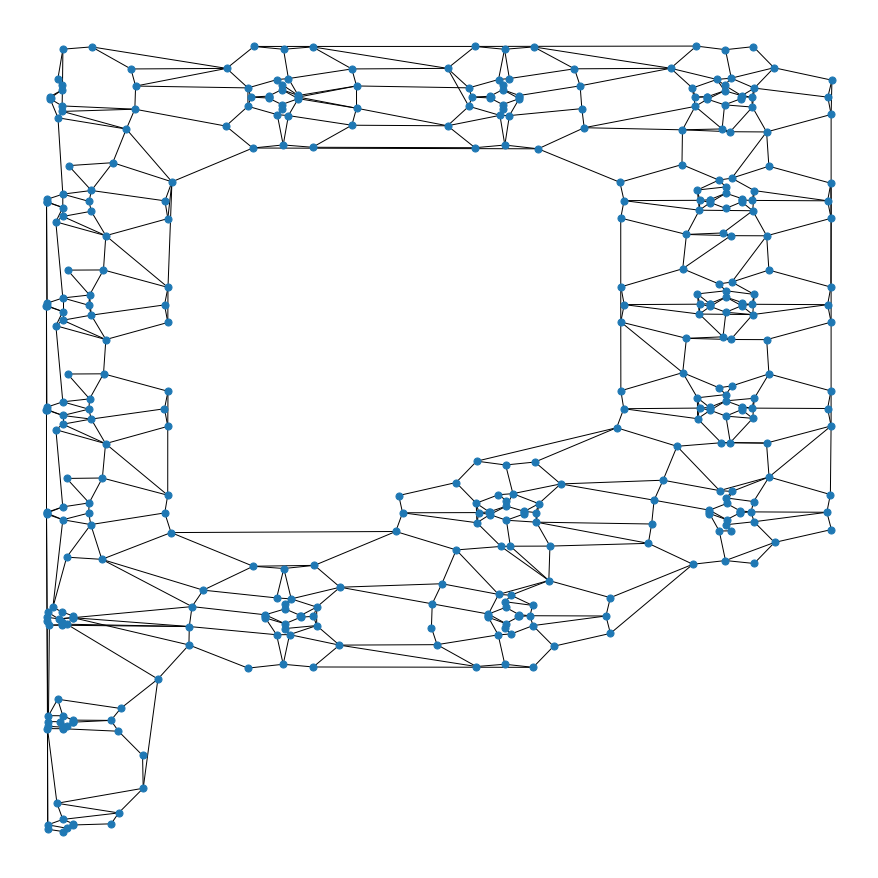

In [148]:
#creation of the graph
graph = nx.Graph()
#adding nodes/connections in the graph
for node in range(len(positions)):
    graph.add_node(node)
graph.add_edges_from(connect)

#plot of the nodes using the (x,y) pairs as coordinates
plt.figure(figsize=(12, 12))
nx.draw(graph, [(x,y) for x,y in positions], node_size=50)


In [132]:
np.transpose((distance_map != 0).nonzero())

array([[ 0,  8],
       [ 0,  9],
       [ 1, 10],
       [ 1, 11],
       [ 2, 23],
       [ 2, 34],
       [ 3, 16],
       [ 3, 51],
       [ 4, 18],
       [ 4, 38],
       [ 5, 20],
       [ 5, 40],
       [ 6, 32],
       [ 6, 42],
       [ 7, 25],
       [ 8,  0],
       [ 9,  0],
       [ 9, 10],
       [10,  1],
       [10,  9],
       [11,  1],
       [11, 29],
       [12, 22],
       [12, 26],
       [13, 23],
       [13, 30],
       [14, 27],
       [14, 44],
       [15, 45],
       [15, 51],
       [16,  3],
       [16, 37],
       [17, 46],
       [17, 53],
       [18,  4],
       [18, 54],
       [19, 47],
       [19, 55],
       [20,  5],
       [20, 56],
       [21, 28],
       [21, 43],
       [22, 12],
       [22, 29],
       [23,  2],
       [23, 13],
       [24, 32],
       [24, 58],
       [25,  7],
       [25, 33],
       [26, 12],
       [26, 34],
       [27, 14],
       [27, 36],
       [28, 21],
       [28, 49],
       [29, 11],
       [29, 22],
       [30, 13

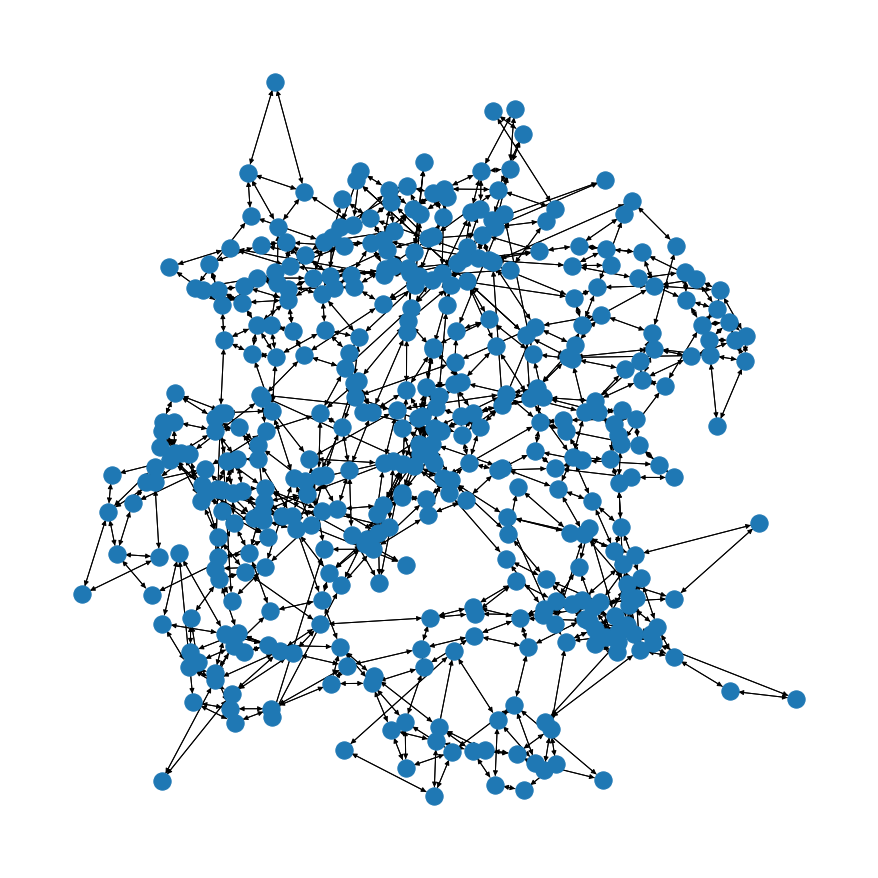

In [149]:

# Create DiGraph from A
G = nx.from_numpy_matrix(distance_map, create_using=nx.DiGraph)

layout = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw(G, layout)
#nx.draw_networkx_edge_labels(G, pos=layout)
plt.show()

In [122]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(pd.DataFrame(distance_map))

          0         1         2         3         4         5         6   \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.336610  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.413107  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.334780  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.469887  0.000000  0.000000  0.000000  0.000000  0.000000   
12  0.000000

In [23]:
angle = 45
angle_n = 360 // angle + 1
angle_list = [angle*i for i in range(angle_n)]
if angle_list[-1] < 360:
    angle_list.append(360)
angle_list

[0, 45, 90, 135, 180, 225, 270, 315, 360]

In [34]:
angle_list[1:]

[45, 90, 135, 180, 225, 270, 315, 360]

In [35]:
angle_list[0:-1]

[0, 45, 90, 135, 180, 225, 270, 315]

In [38]:
for up, low in zip(angle_list[0:-1], angle_list[1:]):
    print(f"up: {up}, low: {low}")

up: 0, low: 45
up: 45, low: 90
up: 90, low: 135
up: 135, low: 180
up: 180, low: 225
up: 225, low: 270
up: 270, low: 315
up: 315, low: 360


In [68]:
value = math.atan2(.5, 1)

if value > 0:
    print(f"{math.degrees(value)}")
else:
    print(f"{(2*math.pi + value) * 360 / (2*math.pi)}")

26.56505117707799


In [91]:
node = 1
[x for x in range(len(q_1)) if x != node]

[0,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [102]:
angle_2d([1, 1], [0, 0])

225.0

In [ ]:
import network

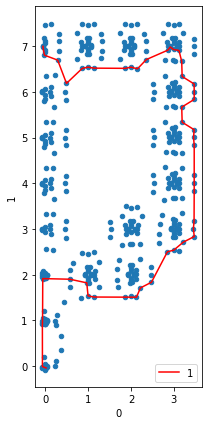

<Figure size 864x864 with 0 Axes>

In [16]:

path = pd.DataFrame([[0.017370, -0.039982], [0.017370, -0.039982], [-0.067906, -0.007481], [-0.069338, 0.918919], [-0.067933, 0.941771], [-0.066921, 0.986906], [-0.064785, 1.043430], [-0.060750, 1.915311], [0.572222, 1.901865], [0.967102, 1.822808], [0.997146, 1.538449], [1.133123, 1.512363], [2.127859, 1.508920], [2.220127, 1.711598], [2.477409, 1.835697], [2.850562, 2.501531], [2.998191, 2.537283], [3.220212, 2.711741], [3.477467, 2.835529], [3.456741, 3.001950], [3.472683, 3.172691], [3.475918, 3.833246], [3.475982, 4.832844], [3.460129, 5.001178], [3.474975, 5.170366], [3.194479, 5.334197], [3.184454, 5.664201], [3.475973, 5.832835], [3.474971, 6.170365], [3.194412, 6.334227], [3.184045, 6.664248], [3.119915, 6.903765], [2.993949, 6.925189], [2.916241, 6.979707], [2.861088, 6.910326], [2.358899, 6.705023], [2.150741, 6.501876], [1.999882, 6.538226], [1.864934, 6.512388], [1.129714, 6.516612], [0.997181, 6.539155], [0.859528, 6.509465], [0.493701, 6.183924], [0.287393, 6.692294], [-0.021832, 6.800359], [-0.057697, 6.984169], [-0.054309, 6.993860], ])

ax = plot_data(p_1, q_1)
path.plot.line(x=0, y=1, style='r', ax=ax, figsize=(3,7))
plt.figure(figsize=(12, 12))
plt.show()